# Introduction to the Assignment 3

## Clusters that I am assigned to:
### 1-) NGC_6645
### 2-) IC_2395
### 3-) FoF_2117

## Goal for this Assignment:
* We will focus on studying the Stellar Density Profiles of **3 Open Clusters** in the Gaia DR3 Dataset, which we have been uniquely assigned to.
    * **Stellar Density Profile:** **Star Counts per unit Area vs. Radius from the centre of the cluster.**

* We will use **Maximum-Likelihood Methods** to: 
    * 1-) **Model the data with an Analytical Function**
    * 2-) **Estimate Errors on Function Parameters**
    * 3-) **Compare Subsets of the data to see if they have the same profiles**

* Finally, we will use **MCMC** to infer the **Cluster Masses** from our Model Fits.

## Initial Setup:

* We first need to import the astropy library and import the fits module from there in order to open the fits files on our code.
* We will also import the libraries we need for the plotting and statistical calculations.

* We will **create a DataFrame that only contains the stars from the Clusters we are assigned to.**
* **We can also include all the stars in our analysis, not just the high-probability cluster members.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

In [2]:
#We import fits module from astropy library.
from astropy.io import fits

In [3]:
#Now we load in our data.
dr3stars = fits.open("gaiadr3_cluster_stars.fits")

#To check the information about the FITS file we have.
#dr3stars.info()

#To check the Column information.
#print(dr3stars[1].columns)

In [4]:
#Now we get our stars using the Pandas library.
import pandas as pd

#Now we assign the table to the Pandas Dataframe as follows.
stars = pd.DataFrame(dr3stars[1].data)

#We strip the white spaces the data has between cluster names in the Name column
#(which are 20 characters long).
stars["Name"] = stars["Name"].str.strip()

#This is our DataFrame straight out of the FITS file.
stars.groupby(["Name"]).size().reset_index(name="count")

,Name,count
0,1636-283,38
1,ADS_16795,41
2,AH03_J0748+26.9,68
3,ASCC_100,87
4,ASCC_101,224
...,...,...
7162,vdBergh_152,25
7163,vdBergh_80,93
7164,vdBergh_83,92
7165,vdBergh_85,105


In [5]:
#We define our stars DataFrame as stars_df.
stars_df = stars

#We define a new clusters DataFrame with all the stars they have.
#size() counts the number of stars in the clusters, counts how many times
#the name of the cluster is mentioned in the star DataFrame which of course
#tells us how many stars there are in a cluster.
clusters_df = stars_df.groupby(['Name']).size().reset_index(name='count')

#We also add the DataFrame the stars' Standard  Deviations in RA (Right 
#Ascension) and Dec (Declination).
clusters_sd = stars_df.groupby(['Name']).std(numeric_only=True).reset_index()
clusters_df['sd_RAdeg'] = clusters_sd['RAdeg']
clusters_df['sd_DEdeg'] = clusters_sd['DEdeg']

#We print our Cluster DataFrame
clusters_df

,Name,count,sd_RAdeg,sd_DEdeg
0,1636-283,38,0.066252,0.053558
1,ADS_16795,41,5.028249,2.071391
2,AH03_J0748+26.9,68,0.057527,0.041799
3,ASCC_100,87,0.848365,0.904561
4,ASCC_101,224,0.903832,1.504867
...,...,...,...,...
7162,vdBergh_152,25,0.863601,0.201857
7163,vdBergh_80,93,0.336260,0.260737
7164,vdBergh_83,92,0.283638,0.200000
7165,vdBergh_85,105,0.107164,0.077127


In [6]:
#We now have to arrange our DataFrames so that it only contains the Clusters
#that we are assigned to.
#For this, we first define a list containing our Cluster names.
cluster_names = ["NGC_6645", "IC_2395", "FoF_2117"]

#Now we use .isin() method from Pandas to define our DataFrames so that it only
#contains the data of our clusters.
clusters_df = clusters_df[clusters_df["Name"].isin(cluster_names)]
stars_df = stars_df[stars_df["Name"].isin(cluster_names)]

In [7]:
#Now we check our Cluster DataFrame
clusters_df

,Name,count,sd_RAdeg,sd_DEdeg
1722,FoF_2117,883,0.167947,0.169847
4288,IC_2395,745,0.540833,0.403015
4780,NGC_6645,559,0.112834,0.120791


In [8]:
#Now we check our Star DataFrame
stars_df

,Name,ID,GaiaDR3,inrt,Prob,RAdeg,e_RAdeg,DEdeg,e_DEdeg,GLON,...,o_RVd,GRVSmag,e_GRVSmag,o_GRVSmag,Vbroad,e_Vbroad,o_Vbroad,VarFlag,NSS,RVS
171292,FoF_2117,1734,4255225830510449664,1,0.561716,282.588811,0.030852,-4.401302,0.028211,28.890342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
171293,FoF_2117,1734,4255225177675353472,1,0.556165,282.677572,0.119432,-4.407614,0.110045,28.925018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
171294,FoF_2117,1734,4255224284322407040,1,0.779946,282.467437,0.039842,-4.354169,0.037440,28.877208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
171295,FoF_2117,1734,4255224245623968640,1,0.828372,282.494314,0.081048,-4.343715,0.072433,28.898726,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
171296,FoF_2117,1734,4255223872004800384,1,0.608063,282.470094,0.048364,-4.393566,0.044810,28.843323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788866,NGC_6645,4784,4096790465630672000,1,0.873059,278.062047,0.017581,-16.872796,0.016192,15.752611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,VARIABLE,0,0
788867,NGC_6645,4784,4096790946667458304,1,0.630187,278.116790,0.057850,-16.834450,0.052714,15.810828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
788868,NGC_6645,4784,4096790946667449216,0,0.480515,278.120992,0.051463,-16.835629,0.045487,15.811626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
788869,NGC_6645,4784,4096790946589751296,1,0.702832,278.118339,0.251964,-16.832393,0.228984,15.813340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0


# Task 1:

* First, **make Stellar Density Profiles for each of your 3 clusters.**
* To do this:
    * **We first need to create a new column in our DataFrame which contains the Radial Separation of each star from the Centre of its cluster.** (In arcseconds)

* **Which means that:**
    * **$r = 3600\sqrt{(x-\bar x)^{2} + (y-\bar y)^{2}}$**
        * **$x$**: RA Position of the Star.
        * **$y$**: DE Position of the Star.
        * **$\bar x$**: Mean of the RA Positions of all Stars.
        * **$\bar y$**: Mean of the DE Positions of all Stars.
        * **$\bar x$ and $\bar y$**: Estimated Location (RA and DE) of the Centre of the Cluster.

* **Then, use the Radial Locations of the Stars to:**
    * 1-) **Make a histogram of:** **Stellar Number Density $\rho_{*}$ vs. Radius**
        * **Stellar Number Density:**
            * Number of Stars in a Radial Bin, Normalized by the Area of the Radial Bin.
            * This will correspond to an Annulus on the sky. (use $arcsec^{2}$ as the units of the area)
     * 2-) **Choose appropriate Radial Binning.**
     * 3-) **Plot the Stellar Density Profiles (and Error Bars, if appropriate) for 3 of our clusters on separate plots.**

## Assumptions:
* 1-) Since Data/Star count is high, we may consider our errors to be normally distributed (if it weren't, they would be poisson distributed).
* 2-) Due to the bins having a lot of star/data counts, according to Central Limit Theorem (CLT) we may assume that the histogram distribution to be normally distributed.

In [9]:
#We first calculate the Radial Separation of the stars from the Centre of their
#individual clusters by using the following function.
def radial_separation(clusters_df, stars_df):
    """Takes the Cluster and Star DataFrame. Checks every single Cluster Name,
    finds all the stars in individual clusters and finds the Radial Separation
    for the stars inside the given cluster. Returns an updated Star DataFrame 
    that has the Radial Separation of the stars in a new DataFrame column 
    called "Radial Separation".
    
    Input:
    ----------------------------------------------------------------------------
    clusters_df: Cluster DataFrame.
    stars_df: Stars DataFrame.
    
    Output:
    ----------------------------------------------------------------------------
    stars_df: Updated Star DataFrame that now contains the values of Star Radial
    Separations.
    
    """
    
    #We first get all the names from our Cluster DataFrame using .unique().
    cluster_names = clusters_df["Name"].unique()
    
    #Now we check every name, get the stars that are in that cluster, then
    #calculate the Radial Separation for the stars in that cluster, add those
    #values to our DataFrame to create a new DataFrame that contains the radial
    #separations.
    for name in cluster_names:    
        #Now we need to get the RA and DEC of the stars.
        #In here we locate the RA and DEC values by using the cluster name!
        RA = stars_df.loc[stars_df["Name"] == name, "RAdeg"]
        DE = stars_df.loc[stars_df["Name"] == name, "DEdeg"]
    
        #We need to take the Averages of RA and DEC values as follows.
        RA_mean = RA.mean()
        DE_mean = DE.mean()
    
        #Now we calculate the Radial Separations as follows.
        radial_separation_values = 3600 * np.sqrt(((RA - RA_mean)**2) + ((DE - DE_mean)**2))
        
        #Now we put the values into our copied DataFrame as a column.
        stars_df.loc[stars_df["Name"] == name, "Radial_Separation"] = radial_separation_values
    
    return stars_df

#We get our new DataFrame as follows.
stars_df = radial_separation(clusters_df, stars_df)

#We print the new DataFrame.
stars_df

C:\Users\kayah\AppData\Local\Temp\ipykernel_12532\1884015061.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stars_df.loc[stars_df["Name"] == name, "Radial_Separation"] = radial_separation_values


,Name,ID,GaiaDR3,inrt,Prob,RAdeg,e_RAdeg,DEdeg,e_DEdeg,GLON,...,GRVSmag,e_GRVSmag,o_GRVSmag,Vbroad,e_Vbroad,o_Vbroad,VarFlag,NSS,RVS,Radial_Separation
171292,FoF_2117,1734,4255225830510449664,1,0.561716,282.588811,0.030852,-4.401302,0.028211,28.890342,...,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,1009.779383
171293,FoF_2117,1734,4255225177675353472,1,0.556165,282.677572,0.119432,-4.407614,0.110045,28.925018,...,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,1319.192606
171294,FoF_2117,1734,4255224284322407040,1,0.779946,282.467437,0.039842,-4.354169,0.037440,28.877208,...,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,676.722862
171295,FoF_2117,1734,4255224245623968640,1,0.828372,282.494314,0.081048,-4.343715,0.072433,28.898726,...,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,777.507243
171296,FoF_2117,1734,4255223872004800384,1,0.608063,282.470094,0.048364,-4.393566,0.044810,28.843323,...,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,612.662041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788866,NGC_6645,4784,4096790465630672000,1,0.873059,278.062047,0.017581,-16.872796,0.016192,15.752611,...,0.0,0.0,0.0,0.0,0.0,0.0,VARIABLE,0,0,360.332750
788867,NGC_6645,4784,4096790946667458304,1,0.630187,278.116790,0.057850,-16.834450,0.052714,15.810828,...,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,310.445779
788868,NGC_6645,4784,4096790946667449216,0,0.480515,278.120992,0.051463,-16.835629,0.045487,15.811626,...,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,300.312641
788869,NGC_6645,4784,4096790946589751296,1,0.702832,278.118339,0.251964,-16.832393,0.228984,15.813340,...,0.0,0.0,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0,314.821826


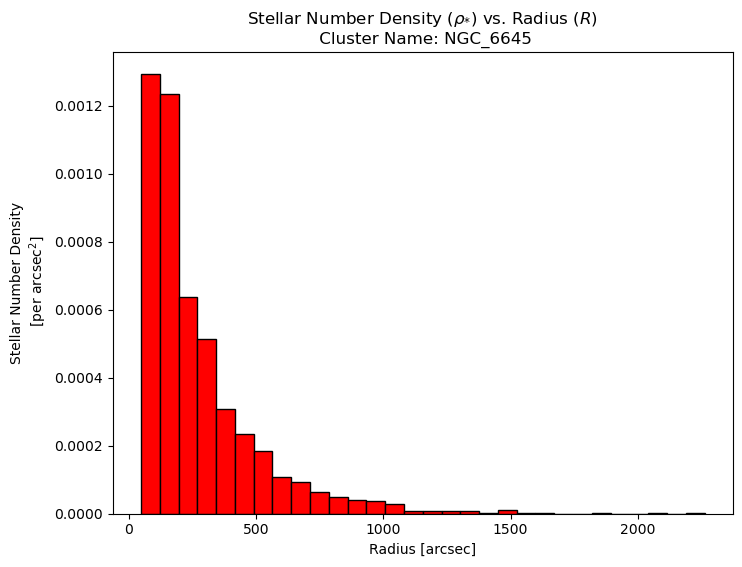

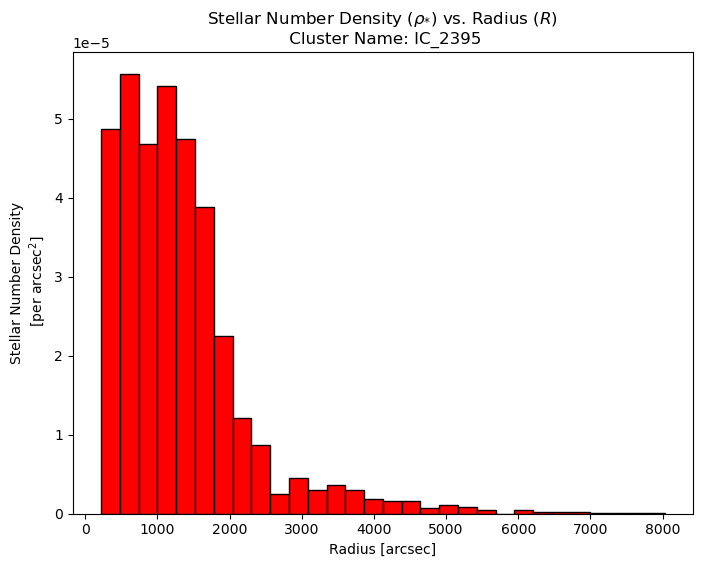

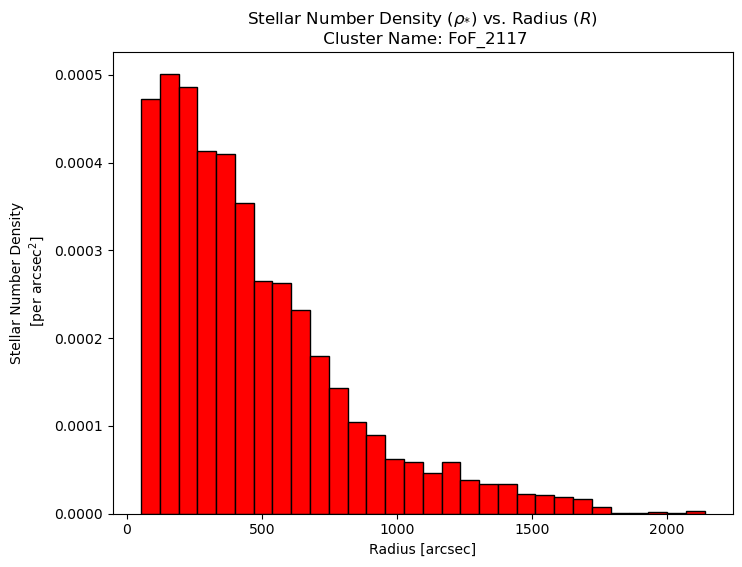

In [10]:
#Now we have to make a histogram of Stellar Number Density vs Radius.
#For this, we again define a function.
def star_num_density_hist(cluster_df, stars_df, cluster_name, plot_result = False):
    """Takes the Cluster and Star DataFrame alongside the cluster's name. Again
    checks every star in the cluster, then uses the "Radial Separation" values 
    on the Star DataFrame in order to make a histogram of Stellar Number Density
    vs. Radius.
    
    Input:
    ----------------------------------------------------------------------------
    clusters_df: Cluster DataFrame.
    stars_df: Stars DataFrame (containing "Radial Separation" column).
    cluster_name: Name of the Cluster we are interested in.
    plot_result: Boolean that decides whether the function should plot the result
    histogram or not.
    
    Output:
    ----------------------------------------------------------------------------
    star_counts: A list containing the Star Counts of the Cluster Histogram.
    bin_edges: A list containing the Bin Edges of the Cluster Histogram.
    if plot_result == True: Histogram of Stellar Number Density vs. Radius.
    
    """
    
    #We get the stars from our cluster.
    cl_stars = stars_df[stars_df["Name"] == cluster_name]
        
    #We now create our histogram and get our "star" counts and bin edges.
    star_counts, bin_edges = np.histogram(cl_stars["Radial_Separation"], bins = 30)
        
    #We now find the centers of the bins as follows.
    #What we are doing is basically taking the x values of start and end
    #of our bin, then dividing it by 2 to get the center.
    bin_centers = (bin_edges[ : -1] + bin_edges[1 : ]) / 2
        
    #Now we find the Area that a bin corresponds to. 
        #Assuming that the area we are looking at on the cluster is circular
        #so the area is πR^2!
        #Note that the area we are looking at can be found by this time
        #substracting the bin edges so that we only get the Radius of the
        #current "circle we are looking at"
    bin_area = np.pi * ((bin_edges[1 : ]**2) - (bin_edges[ : -1]**2))
        
    #We now normalize the Star Counts with the bin area to get the density!
    star_density = star_counts / bin_area
    
    #If the user wants to plot the resulting histogram, we do as follows.
    if plot_result == True:
        #Now we create our Histogram plot as follows.
        plt.figure(figsize = (8, 6))
        
        #Note that the "edgecolor" colors the edges of the bins.
        plt.hist(bin_centers, bins = 30, weights = star_density, color = "red", edgecolor = "black")
        
        #We create our Labels and Titles.
        plt.title(r"Stellar Number Density ($\rho_{*}$) vs. Radius ($R$)" + f"\n Cluster Name: {name}")
        plt.xlabel("Radius [arcsec]")
        plt.ylabel(f"Stellar Number Density\n [per arcsec$^{2}$]")
        
        #We show the plot.
        plt.show()
    
    return star_counts, bin_edges

#We define a list to store the Star Counts and Bin Edges.
star_counts_list, bin_edges_list = [], []

#Now we get the histograms for every cluster we have by using a loop.
#We will plot the histogram only for this time.
for name in cluster_names:
    star_counts, bin_edges = star_num_density_hist(clusters_df, stars_df, name, plot_result = True)
    star_counts_list.append(star_counts)
    bin_edges_list.append(bin_edges)

In [11]:
#For the next step, we need to rebin our histograms.
#We can do that by using the following function. (From Episode 10)
#We define the function that rebins a histogram to given minimum counts per bin.
def histogram_rebin(min_per_bin, counts, edges):
    """Takes Minimum Counts per bin and a histogram counts and bin edges.
    Combines adjacent histogram bins as needed so that no bin has less than
    the required minimum.
    
    Input:
    ----------------------------------------------------------------------------
    min_per_bin: Required minimum counts per bin.
    counts: A list containing the Star Counts of the Cluster Histogram.
    edges: A list containing the Bin Edges of the Cluster Histogram.
    
    Output:
    ----------------------------------------------------------------------------
    counts2: Counts of the rebinned Histogram.
    edges2: Edges of the rebinned Histogram.
    
    """
    
    #We first define arrays for the rebinned Histogram.
    counts2 = np.zeros(1)
    edges2 = np.zeros(1)
    
    #We define a counting system for the loop we will define.
    i = 0
    count_sum = 0
    first_bin_flag = 1
    
    #Now we define that the Rebinned Histogram and Original Histogram share the
    #same first edge value.
    edges2[0] = edges[0]
    
    #Now we define a loop to do the rebinning.
    for x in counts:
        #We do our countings.
        count_sum = count_sum + x
        i = i + 1
        
        #The sum over counts in remaining bins ensures that we are not left
        #with a bin with counts less than our limit at the end.
        if count_sum >= min_per_bin and (sum(counts[i : ]) >= min_per_bin or i == len(counts)):
            #If this is the first bin satisfying our requirement...
            if first_bin_flag == 1:
                #We do not append but replace bin 0 with countsum.
                counts2[0] = count_sum
                
                #Since we read the first bin, we switch it off.
                first_bin_flag = 0
            
            else:
                counts2 = np.append(counts2, count_sum)
            
            edges2 = np.append(edges2, edges[i])
            count_sum = 0
    
    return counts2, edges2

#We define a list to store the rebinned Star Counts and Bin Edges.
star_counts_rebin, bin_edges_rebin = [], []

#Now we get the rebinnned histograms for every cluster we have by using a loop.
for i in range(len(star_counts_list)):
    star_counts_rebinned, bin_edges_rebinned = histogram_rebin(20, star_counts_list[i], bin_edges_list[i])
    star_counts_rebin.append(star_counts_rebinned)
    bin_edges_rebin.append(bin_edges_rebinned)

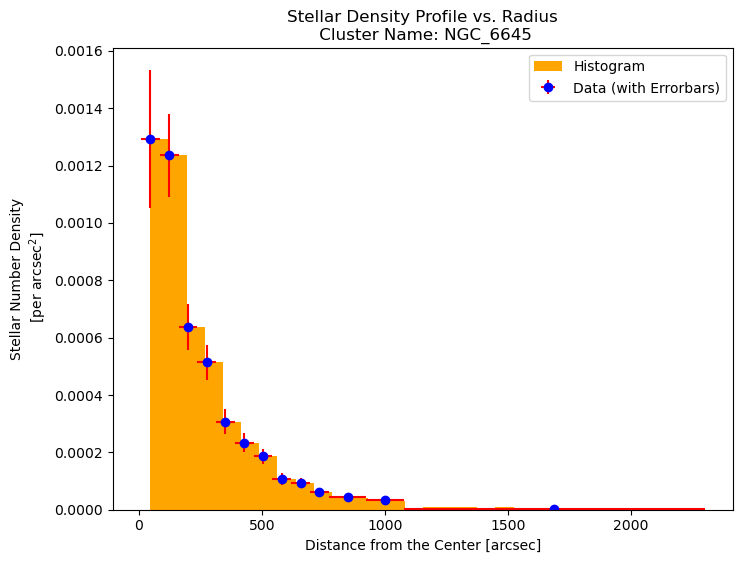

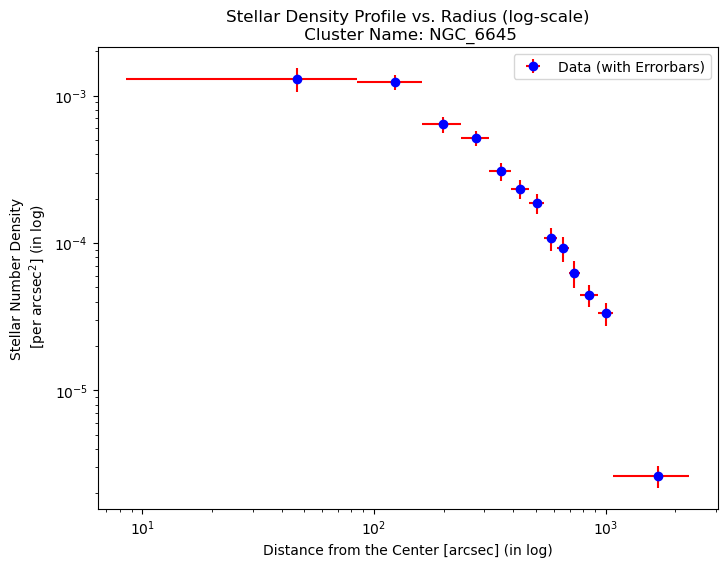

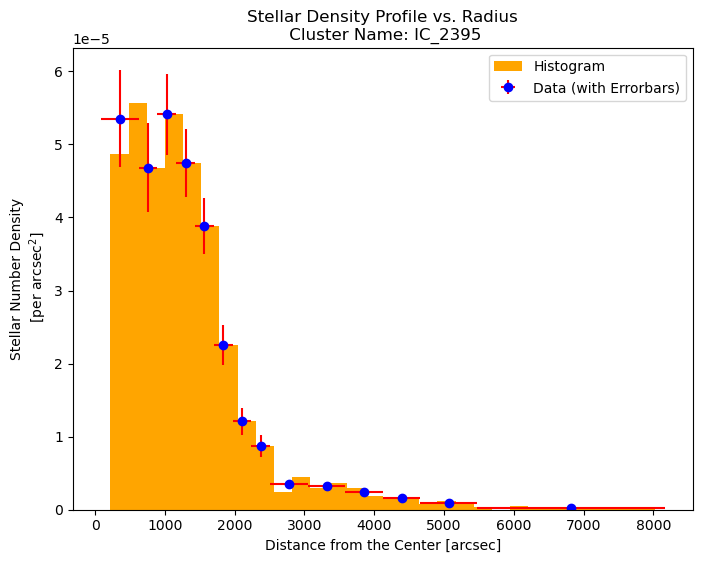

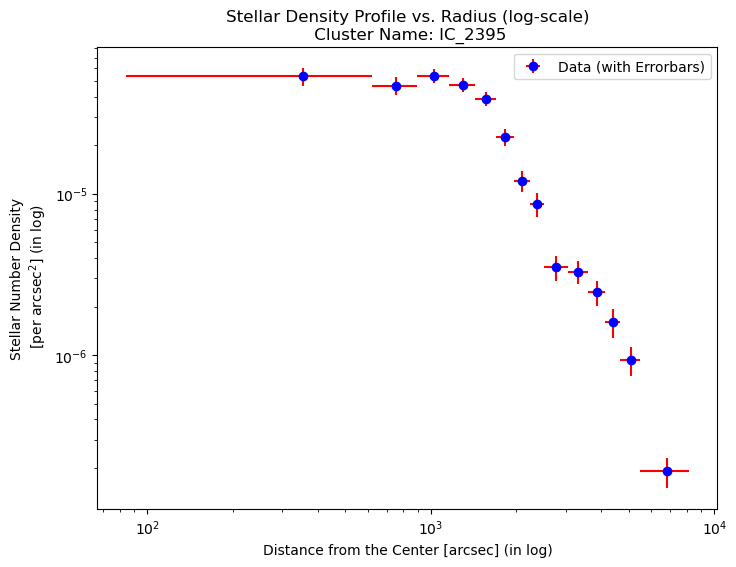

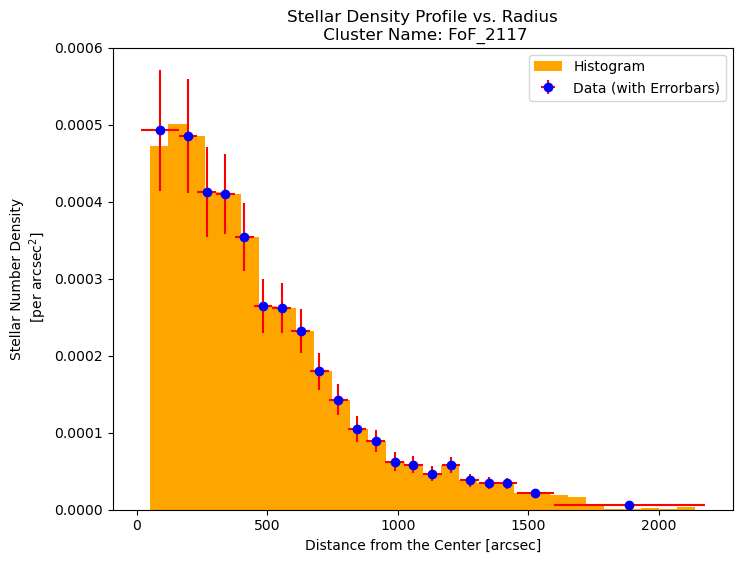

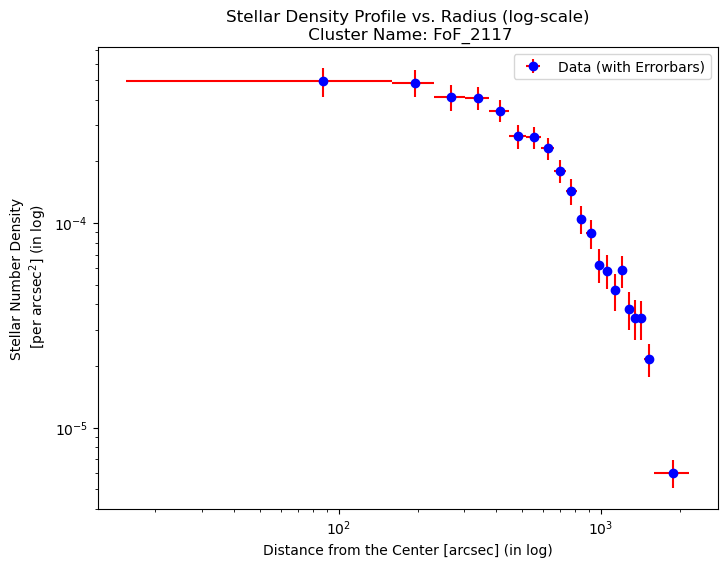

In [12]:
#Now we have to plot the Stellar Density Profile vs Radius.
#For this, we again define a function.
def stellar_density_profile(cluster_df, stars_df, cluster_name, 
                            plot_result = False, hist_vs_data = False,
                            include_errors = False, return_bin_edges = False):
    """Takes the Cluster and Star DataFrame alongside the cluster's name. Then
    by checking the Cluster Name, uses the "Radial Separation" values on the 
    Star DataFrame in order to plot the Stellar Density Profile vs. Radius plot
    of the Cluster.
    
    Input:
    ----------------------------------------------------------------------------
    clusters_df: Cluster DataFrame.
    stars_df: Stars DataFrame (containing "Radial Separation" column).
    cluster_name: Name of the Cluster we are interested in.
    plot_result: Boolean that decides whether the function should plot the 
    resulting Stellar Number Density vs. Radius plot or not.
    hist_vs_data: Boolean that decides whether the function should plot the
    comparison of the histogram and data or not.
    include_errors: Boolean that decides whether the function should return the
    x and y axis errors or not.
    return_bin_edges: Boolean that decides whether the function should ONLY 
    return the bin edges or not.
    
    Output:
    ----------------------------------------------------------------------------
    star_density_values: The stellar density values for all Clusters.
    radii: Radius values for all Clusters.
    if plot_result == True: Stellar Density Profile vs. Radius plots of our
    Cluster will be plotted.
    if hist_vs_data == True: The comparison of our data (with error bars) and 
    histogram will be plotted.
    if include_errors == True: The function will return yerr (errors on the y
    axis) and xerr (errors on the x axis) respectively as a list.
    if return_bin_centers == True: The function will ONLY return the bin edges!
    
    """
    
    #We define numpy arrays to store the Stellar Densities and radii.
    star_density_values, radii = np.array([]), np.array([])
    
    #We get the histogram for our Cluster.
    counts, edges = star_num_density_hist(cluster_df, stars_df, cluster_name)
    
    #We rebin the histogram for our Cluster.
    star_counts, bin_edges = histogram_rebin(20, counts, edges)
    
    #We now find the centers of the bins as follows.
    #What we are doing is basically taking the x values of start and end
    #of our bin, then dividing it by 2 to get the center.
    bin_centers = (bin_edges[ : -1] + bin_edges[1 : ]) / 2
        
    #We also get the bin widths as follows.
    bin_widths = np.diff(bin_edges)
        
    #Now we find the Area that a bin corresponds to. 
        #Assuming that the area we are looking at on the cluster is circular
        #so the area is πR^2!
        #Note that the area we are looking at can be found by this time
        #substracting the bin edges so that we only get the Radius of the
        #current "circle we are looking at"
    bin_area = np.pi * ((bin_edges[1 : ]**2) - (bin_edges[ : -1]**2))
        
    #We find the errors as follows.
    errors = np.sqrt(star_counts) / bin_area
        
    #We now normalize the Star Counts with the bin area to get the density!
    star_density = star_counts / bin_area
        
    #We add star density and radii values to our numpy arrays!
    star_density_values = np.concatenate((star_density_values, star_density))
    radii = np.concatenate((radii, bin_centers))
    
    #If the user wants to plot the resulting plot, we do as follows.
    if plot_result == True:
        #Now we create our Stellar Density Profile plot as follows.
        plt.figure(figsize = (8, 6))
        
        #Now we also plot our errorbars as follows.
        plt.errorbar(bin_centers, star_density, xerr = bin_widths / 2, 
                     yerr = errors, fmt = "o", color = "blue", ecolor = "red",
                     label = "Data (with Errorbars)")
        
        #We create our Labels and Titles.
        plt.title(r"Stellar Density Profile vs. Radius (log-scale)" + f"\n Cluster Name: {name}")
        plt.xlabel("Distance from the Center [arcsec] (in log)")
        plt.ylabel(f"Stellar Number Density\n [per arcsec$^{2}$] (in log)")
    
        #We change the axis scales to logarithm.
        plt.xscale("log")
        plt.yscale("log")
    
        #If the user wants to compare the data with our histogram, we do the 
        #following.
        if hist_vs_data == True:
            bin_area_hist = np.pi * ((edges[1 : ]**2) - (edges[ : -1]**2))
            bin_centers_hist = (edges[ : -1] + edges[1 : ]) / 2
            star_density_hist = counts / bin_area_hist
            plt.hist(bin_centers_hist, bins = 30, weights = star_density_hist, color = "orange", label = "Histogram")
            plt.title(r"Stellar Density Profile vs. Radius" + f"\n Cluster Name: {name}")
            plt.xlabel("Distance from the Center [arcsec]")
            plt.ylabel(f"Stellar Number Density\n [per arcsec$^{2}$]")
            plt.xscale("linear")
            plt.yscale("linear")
        
        #We add a legend.
        plt.legend()
        
        #We show the plot.
        plt.show()
    
    #If the user wants to include the errors as well, we return the errors
    #as follows.
    if include_errors == True:
        yerr = errors
        xerr = bin_widths / 2
        return star_density_values, radii, yerr, xerr
    
    elif return_bin_edges == True:
        return bin_edges
    
    elif include_errors == False:
        return star_density_values, radii

#Again we define lists to store Star Densities and Radii as follows.
star_densities_list, radii_list = [], []

#Now we get Stellar Density Profile and Radii for every cluster we have 
#by using a loop.
for name in cluster_names:
    star_densities, radii = stellar_density_profile(clusters_df, stars_df, name, plot_result = True, hist_vs_data = True)
    star_densities, radii = stellar_density_profile(clusters_df, stars_df, name, plot_result = True)
    star_densities_list.append(star_densities)
    radii_list.append(radii)

## Comments:
* Histograms and Stellar Number Densities of **clusters NGC 6645 and FoF 2117** looks reasonable.
* As expected, the central parts of the clusters has more star counts/star densities compared to the edges of the clusters.
* We can see that at the edges of the histograms, the error bars for x and y axes are a lot more higher than the other data points.
* This could be due to the observation techniques, normally we do cut a tiny bit of the edges of the histogram, depending on the dataset we are working with since edges distort the data.
* **For the cluster IC 2395** we see two bumps which is an interesting and uncommon characteristic for clusters.
    * In the following task this will be discussed further as this "unexpected" bump causes a bad fit and some issues.

# Task 2:

* Now you will fit a model to your Cluster Stellar Density Profiles, **using lmfit**, which is demonstrated in the course online material.
* The model you will use is **a variant of the King Profile**.
* **It is an Empirical Function which is usually able to provide good fits to the Stellar Density Profiles of Open and Globular Clusters.**

$$
\rho_{\text {King }}(r)=\rho_0\left[\frac{1}{\sqrt{1+\left(r / r_c\right)^2}}-\frac{1}{\sqrt{1+\left(r_t / r_c\right)^2}}\right]+c \text {, where } r \leq r_t
$$

$$\rho_{\text {King }}(r)=c\text {, where } r>r_t$$.

* **In here:**
    * **$\rho_0$**: Normalization Factor
    * **$r_c$**: Core Radius of the Cluster
    * **$r_t$**: Tidal Radius (where the cluster is truncated)
    * **$c$**: Constant which corresponds to the Number Density of unassociated foreground/background stars.
        * Which may be very small for these data since the cluster stars have already been pre-selected based on the association in Astrometric Parameter Space.

* Fit the King Model to the Stellar Density Profiles of your 3 clusters to:
    * 1-) Obtain the **MLEs (Maximum Likelihood Estimates)** for the parameters.
    * 2-) **Obtain a goodness of fit of the Model where appropriate.**

* **Plot the data again with the Model Fits and Residuals (or Ratios) as appropriate.**

* **Obtain 1-$\sigma$ confidence intervals on the model parameters.**
* **If the intervals are not closed:** (They include the bounds of the fitted parameters, or zero or infinity)
    * **Obtain 3-$\sigma$ upper or lower (as appropriate) limits on the parameters.**

## Assumptions:
* 1-) Since Data/Star count is high, we may consider our errors to be normally distributed (if it weren't, they would be poisson distributed).
* 2-) Due to the bins having a lot of star/data counts, according to Central Limit Theorem (CLT) we may assume that the histogram distribution to be normally distributed.
* 3-) For MLE we need the assumption that the data is **i.i.d (Independent and Identically Distributed)!**
* 4-) This means that the observation data we have are independent from one another and also drawn from the same distribution!

In [13]:
#We first define a function for our King-Profile.
def King_Profile(radius, parameters):
    """Takes the parameters and returns the appropriate equation depending on
    the conditions that is defined for King Model.
    
    Input:
    ----------------------------------------------------------------------------
    radius: The radius of the cluster "circle" we are in.
    parameters: lmfit Parameters Object that contains the following:
        rho_0: Normalization factor.
        r_c: Core radius of the cluster.
        r_t: Tidal Radius of the cluster. (Where the cluster is truncated)
        c: Constant which corresponds to the Number Density of unassociated
        foreground & background stars.
    
    Output:
    ----------------------------------------------------------------------------
    rho_king: Stellar Density Model at given Radius of the cluster.
    
    """
    
    #We get our parameters.
    p = parameters.valuesdict()
    
    if radius <= p["r_t"]:
        rho_king = (p["rho_0"] * ((1/np.sqrt(1 + (radius/p["r_c"])**2)) - (1/np.sqrt(1 + (p["r_t"]/p["r_c"])**2)))) + p["c"]
    
    else:
        rho_king = p["c"]
    
    return rho_king

In [14]:
#We define a function to integrate over all bins.
#In here we have to note that in our integration we have to consider the area
#as well since the Stellar Number Densities we have are per area!!!
def bin_model(xbins, model, parameters):
    """General function for integrating the input Model over bins defined by
    continous (no gaps) bin edges i.e. xbins
    
    Input:
    ----------------------------------------------------------------------------
    xbins: x axis bin edges.
    model: The model name.
    parameters: The associated Parameters object.
    
    Output:
    ----------------------------------------------------------------------------
    y_model: Calculated Counts-Density Model values for y-axis.
    
    """
    
    #We define a count.
    i = 0
    
    #We define the Count-Density Model values as an array.
    y_model = np.zeros(len(xbins)-1)
    
    #We now do a loop to integrate over bins and dividing the result with bin
    #width.
    for i, xval in enumerate(xbins[ : -1]):
        #We do the integration over the bin.
            #lambda is basically a "small function"
            #In here "x" is our radius i.e. Independent Variable!
        y_model[i], y_model_err = spint.quad(lambda x: 2 * np.pi * x * model(x, parameters), xbins[i], xbins[i+1])
        
        #We divide it with the bin area as follows.
        bin_area = np.pi * ((xbins[1 : ]**2) - (xbins[ : -1]**2))
        y_model[i] = y_model[i] / (bin_area[i])
    
    return y_model

In [15]:
#Now we define a function that uses least squares method.
#We define this function specifically to get either residuals or the y-model
#values by simply using the "output_residual" argument in our function.
def lmfit_least_squares(parameters, xdata, ydata, yerror, model, output_residual = True):
    """lmfit objective function to calculate and return the Residual Array or
    Model y-values for Binned Data, where the xdata are the input bin edges and
    ydata are the densities (i.e. integral over bin divided by bin width).
    
    Input:
    ----------------------------------------------------------------------------
    parameters: Name of lmfit Parameters object set up for the fit.
    xdata: Bin Edges. (Not Bin Centers!) => To be fitted
    ydata: Count Densities. (Integral over bin / bin width) => To be fitted
    yerror: Errors on Count Densities. => To be fitted
    model: The name of the Model Funtion to be used. (Must take parameters as 
    its input parameters and return the model y-value array for a given x-value
    array!)
    output_residual: Boolean set to True if the lmfit objective function
    (residuals) is required output, otherwise a list of model y-value arrays
    (corresponding to the input x-data list) is returned.
    
    Output:
    ----------------------------------------------------------------------------
    residual:
        If output_residual == True: The function Returns a residual array of
    (y_i - y_model(x_i))/y_err_i which is concatenated into a single array
    for all input data errors. (i.e. length is n1 + n2 in the example below.)
    
    y_model:
        If output_residual == False: Returns a list of y-model arrays. (one per
    input x-array.)
    
    Example:
    ----------------------------------------------------------------------------
    For 2 datasets to be fitted simultaneously:
        xdata = [x1, x2]
        ydata = [y1, y2]
        yerrs = [err1, err2]
    
    In here x1, y1, err1 and x2, y2, err2 are the "data" sets of 1-D arrays of
    length n1 and n2 respectively. 
        Length is n1+1 for x1 since it is binedges!
        Length is n2+2 for x2 since it is binedges!
    
    Note: A single Data Set should also be given via a list, i.e. xdata = [x1],
    ydata = [y1], yerr = [err1].
    
    """
    
    if output_residual == True:
        #We loop through each input dataset (lists) and record residual array.
        for i, xvals in enumerate(xdata):
            if i == 0:
                residual = (ydata[i] - bin_model(xdata[i], model, parameters)) / yerror[i]
            
            else:
                residual = np.append(residual, (ydata[i] - bin_model(xdata[i], model, parameters)) / yerror[i])
            
        return residual
    
    else:
        y_model = []
        #We record a list of model y-value arrays, one per input Dataset.
        for i, xvals in enumerate(xdata):
            y_model.append(bin_model(xdata[i], model, parameters))
        
        return y_model

In [16]:
#Now we define a function that does the fitting with the lmfit library.
#For this we first import lmfit.
from lmfit import Parameters, Minimizer, minimize, report_fit

In [17]:
#We first create a function that plots out the comparison of our data and 
#fit model.
#We will use this in our following loop on the next cells.
def plot_data_model(bin_edges, count_densities, count_densities_err, count_densities_model, name):
    """
    
    Input:
    ----------------------------------------------------------------------------
    energybinedges: Energy bin edges.
    count_densities: Count Densities.
    count_densities_err: Count Density Errors.
    count_densities_model: Model Count Densities.
    
    Output:
    ----------------------------------------------------------------------------
    Stepped Histogram Plot alongside the Data/Model Ratio Plot.
    
    """
    
    #We get our energies from the energy bin edges.
    bin_centers = (bin_edges[1 : ] + bin_edges[ : -1]) / 2
    
    #Now we get our bin widths as follows.
    bin_widths = np.diff(bin_edges)
    
    #We define our figure, note that it will have 2 separate plots combined
    #into one.
        #First Plot => Histogram
        #Second Plot => Data/Model Ratio
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 6), sharex = True,
                                   gridspec_kw = {"height_ratios" : [2, 1]})
    
    #We adjust our subplots to have zero space between them horizontally.
    fig.subplots_adjust(hspace = 0)
    
    #We plot the errorbars for the first plot.
    ax1.errorbar(bin_centers, count_densities, xerr = bin_widths/2,
                 yerr = count_densities_err, fmt = "o", label = "Data")
    
    #We plot our first plot i.e. histogram.
    model_hist, edges, patches = ax1.hist(bin_centers, bins = bin_edges,
                                          weights = count_densities_model,
                                          density = False, histtype = "step",
                                          label = "Model Histogram")
    
    #We also plot our fit as a line.
    ax1.plot(bin_centers, model_hist, "-", label = "King Model")
    
    #We get a legend for our first plot.
    ax1.legend()
    
    #We now plot the errorbars for the second plot.
    ax2.errorbar(bin_centers, count_densities/count_densities_model, xerr = bin_widths/2,
                 yerr = count_densities_err/count_densities_model, fmt = "o")
    
    #Now we plot the labels as follows.
    ax2.set_xlabel("Radius [Arcsec]", fontsize = 16)
    ax2.set_ylabel("Data/Model", fontsize = 14)
    ax1.set_ylabel("Counts/Arcsec^2", fontsize = 14)
    
    #We plot a horizontal line that represents 1 (where the data and the model
    #are the same) as follows.
    ax2.axhline(1.0, color = "r", linestyle = "dotted", lw = 2)
    
    #We also plot the "ticks" on both plots' axes as follows.
    ax1.tick_params(labelsize = 14)
    ax1.tick_params(axis = "x", direction = "in", which = "both", length = 4)
    
    ax2.tick_params(axis = "x", which = "both", length = 4)
    ax2.tick_params(labelsize = 14)
    
    #We also create a label for our plot.
    fig.suptitle(f"{name} Data and Model/Fit Comparison")
    
    #Now we set all of the scales to log.
    ax1.set_yscale("log")
    ax1.set_xscale("log")
    ax2.set_xscale("log")
    
    #We set the label locations.
    ax1.get_yaxis().set_label_coords(-0.12, 0.5)
    ax2.get_yaxis().set_label_coords(-0.12, 0.5)
    
    #Now we finally set the xlimit on both the plots (since they share the same
    #x axis)
        #Note: We must show only the Energy Range where the data is samples to
        #avoid impression from model that the Flux suddenly drops at the end
        #of boundaries.
    ax2.set_xlim(bin_edges[0], bin_edges[-1])
    
    plt.show()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cluster Name: NGC_6645
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 101
    # data points      = 13
    # variables        = 4
    chi-square         = 15.7447721
    reduced chi-square = 1.74941912
    Akaike info crit   = 10.4902673
    Bayesian info crit = 12.7500647
[[Variables]]
    rho_0:  0.00212808 +/- 5.9484e-04 (27.95%) (init = 0.001293917)
    r_c:    74.3184002 +/- 24.8857480 (33.49%) (init = 4.245546)
    r_t:    1154.51105 +/- 66.1499980 (5.73%) (init = 1078.07)
    c:      2.4280e-06 +/- 6.9238e-07 (28.52%) (init = 1e-08)
[[Correlations]] (unreported correlations are < 0.100)
    C(rho_0, r_c) = -0.9613
    C(r_t, c)     = -0.5144
    C(r_c, r_t)   = -0.3978
    C(rho_0, r_t) = +0.2235
    C(r_c, c)     = +0.1679
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

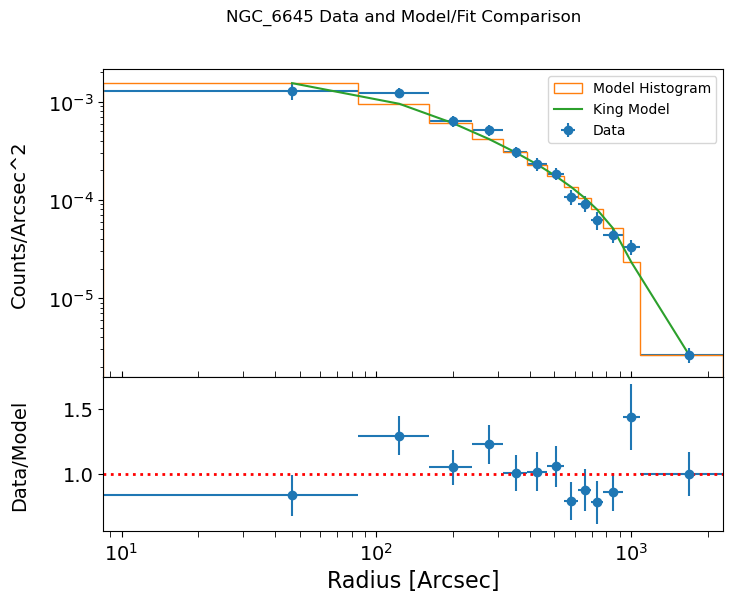

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cluster Name: IC_2395
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 14
    # variables        = 3
    chi-square         = 159.940147
    reduced chi-square = 14.5400134
    Akaike info crit   = 40.1003927
    Bayesian info crit = 42.0175647
[[Variables]]
    rho_0:  1.0451e-04 +/- 7.5918e-05 (72.64%) (init = 5.41167e-05)
    r_c:    386.781593 +/- 337.693745 (87.31%) (init = 445.9346)
    r_t:    5355.36106 +/- 559.746239 (10.45%) (init = 4662.171)
    c:      0 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(rho_0, r_c) = -0.9640
    C(r_c, r_t)   = -0.3770
    C(rho_0, r_t) = +0.2210
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Minimum Chi-squared = 159.9401469783912 for 11 d.o.f.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~

C:\Users\kayah\AppData\Local\Temp\ipykernel_12532\2839360026.py:53: RuntimeWarning: divide by zero encountered in divide
  ax2.errorbar(bin_centers, count_densities/count_densities_model, xerr = bin_widths/2,
C:\Users\kayah\AppData\Local\Temp\ipykernel_12532\2839360026.py:54: RuntimeWarning: divide by zero encountered in divide
  yerr = count_densities_err/count_densities_model, fmt = "o")
C:\Users\kayah\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:3642: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err


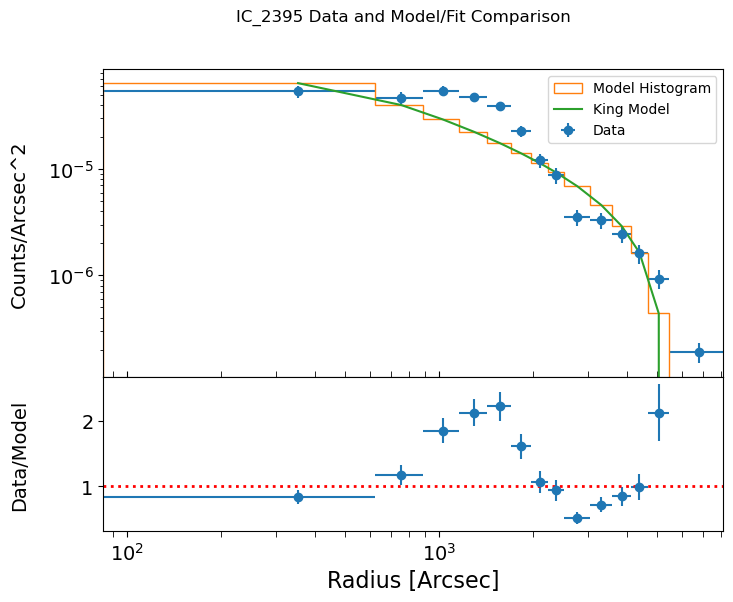

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cluster Name: FoF_2117
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 85
    # data points      = 21
    # variables        = 4
    chi-square         = 21.3715241
    reduced chi-square = 1.25714848
    Akaike info crit   = 8.36827592
    Bayesian info crit = 12.5463657
[[Variables]]
    rho_0:  7.5108e-04 +/- 7.9773e-05 (10.62%) (init = 0.0004927706)
    r_c:    273.420278 +/- 47.4467500 (17.35%) (init = 7.699055)
    r_t:    1688.83689 +/- 70.7026631 (4.19%) (init = 1600.149)
    c:      5.5745e-06 +/- 1.3570e-06 (24.34%) (init = 1e-08)
[[Correlations]] (unreported correlations are < 0.100)
    C(rho_0, r_c) = -0.8627
    C(r_t, c)     = -0.6559
    C(r_c, r_t)   = -0.4914
    C(r_c, c)     = +0.2165
    C(rho_0, r_t) = +0.1558
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

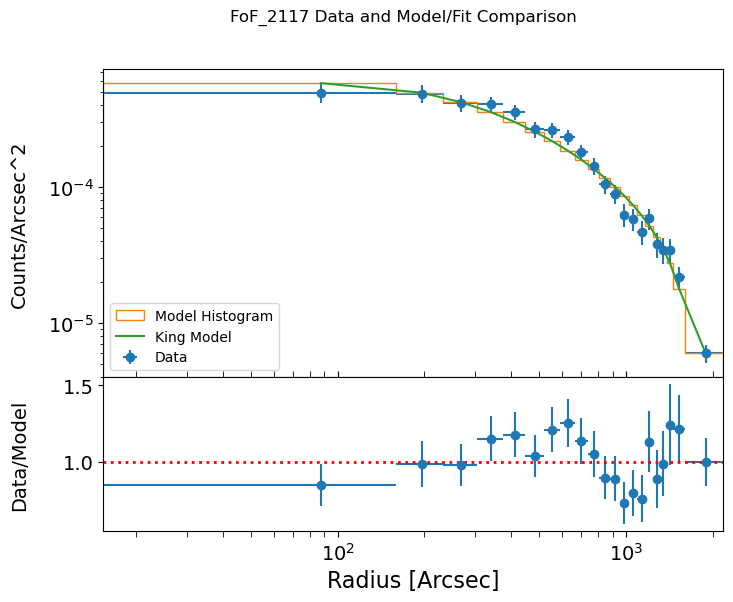

In [18]:
#For the following calculations, we import the following libraries.
import scipy.integrate as spint
import scipy.stats as sps

#Then we define our Fit Model, which is the King-Model.
model = King_Profile

#Now we say that our output should be residual as follows.
output_residual = True

#For the next steps, we need to do a fit to all the clusters.
#For that reason we will be in a loop for the following steps.
for name in cluster_names:
    #We get the histogram for our Cluster.
    counts, edges = star_num_density_hist(clusters_df, stars_df, name)

    #We rebin the histogram for our Cluster.
    star_counts, bin_edges = histogram_rebin(20, counts, edges)
    
    #We get the star densities and radii values.
    star_densities, radii, yerr, xerr = stellar_density_profile(clusters_df, 
                                        stars_df, name, include_errors = True)
    
    #We define the results we get from the function as our datasets as follows.
    xdata = [bin_edges]
    ydata = [star_densities]
    yerror = [yerr]

    #We first define the Parameters.
    Parameters_Fit = Parameters()

    #We add our parameters to our Parameters_Fit as follows.
    #Since the Radius values can not be a negative value we set the minimum
    #value for them to be zero.
        #rho_0:  Normalization Factor (we can estimate)
        #r_c: Core Radius of the Cluster (we can estimate)
        #r_t: Tidal Radius (where the cluster is truncated) (we can estimate)
        #c: Constant which corresponds to the Number Density of unassociated 
        #foreground/background stars. (we won't estimate exactly)
    
    #Critical Density/Normalization Factor is basically the peak of the profile.
    rho_0_initial = max(ydata[0])
    
    #Core Radius can be estimated with the Radius of the Maximum Density divided
    #by 2 as follows.
    max_density_index = np.unravel_index(np.argmax(ydata[0], axis=None), ydata[0].shape)
    r_c_initial = xdata[0][max_density_index] / 2
    
    #Tidal Radius can be estimated by checking where the decrease on the stellar 
    #density is a lot, so we can say that that's where the cluster is truncated.
    #We create a threshold for decrease.
    threshold_density = 0.02
    truncation_index = np.where(ydata[0] < threshold_density * np.max(ydata[0]))[0]
    r_t_initial = xdata[0][truncation_index][0]
    
    #For cluster IC_2395 there is a second bump. But our Fit does fitting only
    #for the first bump and not the second one. For that reason when we are
    #dealing with that cluster, we'll set c = 0 and keep it constant.
    #For other clusters, the fitting process works totally fine.
    if name == "IC_2395":
        Parameters_Fit.add_many(("rho_0", rho_0_initial, True, 0),
                                ("r_c", r_c_initial, True, 0),
                                ("r_t", r_t_initial, True, 0),
                                ("c", 0, False, 0))
    
    else:
        Parameters_Fit.add_many(("rho_0", rho_0_initial, True, 0),
                                ("r_c", r_c_initial, True, 0),
                                ("r_t", r_t_initial, True, 0),
                                ("c", 1e-8, True, 0))
    
    #We now define our fit function as follows.
    fit_function = Minimizer(lmfit_least_squares, Parameters_Fit, 
                   fcn_args = (xdata, ydata, yerror, model, output_residual),
                   nan_policy = "omit")
    
    #We get our results from the fit as follows.
    result = fit_function.minimize(method = "leastsq")
    
    #We now report our fit.
    print(60 * "~")
    print(f"Cluster Name: {name}")
    print(60 * "~")
    report_fit(result)
    print(60 * "~")
    
    #We also report our Minimum Chi-Squared value for our Degrees of Freedom.
    print(60 * "~")
    print("Minimum Chi-squared = "
          + str(result.chisqr)
          + " for "
          + str(result.nfree) 
          + " d.o.f.")
    print(60 * "~")
    
    #We finally report the goodness of the fit as well.
    print("The goodness of fit is: ", sps.chi2.sf(result.chisqr, df = result.nfree))
    print(60 * "~")
    print(60 * "")
    print(60 * "-")
    print(60 * "")
    
    #To calculate the best-fitting model values, use the parameters of the best fit
    #output from the fit i.e. result.parameters.
    #From there, set output_residual = False to output a list of model y-values.
    model_values = lmfit_least_squares(result.params, xdata, ydata, yerror, model, output_residual = False)
    
    #Now we plot our Data with Model and Residual.
    #The plotting function we defined takes the array of model values, so we must
    #specify the index for the model_values list, to provide this array.
    plot_data_model(bin_edges, star_densities, yerr, model_values[0], name)

In [19]:
#Now our goal is to get the Confidence Intervals and MLEs (Maximum Likelihood
#Estimates) of our parameters.
#For this first we define the following function to find the grid value for
#any given parameter.
def grid1D_chisquare_minimize(p_name, p_range, p_steps, parameters, model, xdata, ydata, yerror):
    """Uses lmfit and finds the Best Fit. Then carries our Chi Squared 
    minimisation for a 1D grid of fixed parameters.
    
    Input:
    ----------------------------------------------------------------------------
    p_name: String, name of the "p" parameter to use for grid. (In input
    Parameters object "parameters")
    p_range: Range for the Grid. (Tuple or List)
    p_steps: Number of Steps for the grid.
    parameters: lmfit Parameters object for model to be fitted.
    model: The name of the Model Funtion to be used. (Must take parameters as 
    its input parameters and return the model y-value array for a given x-value
    array!)
    xdata: Bin Edges. (Not Bin Centers!) => To be fitted
    ydata: Count Densities. (Integral over bin / bin width) => To be fitted
    yerror: Errors on Count Densities. => To be fitted
    
    Output:
    ----------------------------------------------------------------------------
    p_best: Best fitting value for parameter "p"
    min_chi_sq: Minimum Chi-Squared (for p_best!)
    p_grid: Grid of "p" values used to obtain fits.
    chi_sq_grid: Grid of chi-squared values, corresponding to p_grid.
    
    Note:
    ----------------------------------------------------------------------------
    xdata, ydata, yerror are the same inputs we used at the lmfit_least_squares
    function we have defined previously.
    
    """
    
    #We first define our np.array for the parameter grid.
    p_grid = np.linspace(p_range[0], p_range[1], p_steps)
    
    #We also define our np.array for chi-squared grid.
    chi_sq_grid = np.zeros(len(p_grid))
    
    #Now we obtain the Best-Fitting value for "p" and corresponding chi-squared!
    set_function = Minimizer(lmfit_least_squares, parameters,
                             fcn_args = (xdata, ydata, yerror, model, True),
                             nan_policy = "omit")
    
    #Now we get the result of the minimisation.
    result = set_function.minimize(method = "leastsq")
    
    #We get the minimum chi squared value for "p" by using the result we have.
    min_chi_sq = result.chisqr
    
    #Now we get the Best-Fitting value for "p" as follows.
    p_best = result.params.valuesdict()[p_name]
    
    #Now we fit for each parameter ("p") in the grid.
    #To do so, we use .add() method for the Parameters object to replace the
    #value of "p_name" with the value for the grid.
    #We also set the vary = False to freeze the value so that it cannot vary
    #in the fit (only the other parameters will be left to vary).
    for i, p_value in enumerate(p_grid):
        #We add our parameter to our Parameters object.
        parameters.add(p_name, value = p_value, vary = False)
        
        #We again do the fit.
        set_function = Minimizer(lmfit_least_squares, parameters,
                             fcn_args = (xdata, ydata, yerror, model, True))
        
        #We get the results from the fit.
        result = set_function.minimize(method = "leastsq")
        
        #We add the chi squared result to our grid for each parameter.
        chi_sq_grid[i] = result.chisqr
    
    return p_best, min_chi_sq, p_grid, chi_sq_grid

In [20]:
#Now we will calculate the Confidence Interval.
#For this we first need to import the library we need for interpolation.
import scipy.interpolate as spinterp

#Now we define a function to get the value of a parameter, given the chi-squared
#interval, so basically sigma interval.
def calculate_error_chi_squared(delta_chi_sq, p_best, min_chi_sq, p_grid, chi_sq_grid):
    """Returns the Upper and Lower values of a parameter "p" for a given delta-
    chi-squared value.
    
    Input:
    ----------------------------------------------------------------------------
    delta_chi_sq: The Delta-Chi-Squared for the confidence interval required.
    (Example: 1 for 1-sigma error!)
    p_best: Best fitting value for parameter "p"
    min_chi_sq: Minimum Chi-Squared (for p_best!)
    p_grid: Grid of "p" values used to obtain fits.
    chi_sq_grid: Grid of chi-squared values, corresponding to p_grid.
    
    Output:
    ----------------------------------------------------------------------------
    [p_lower, p_upper]: The lower and upper values for parameter "p".
    
    """
    
    #We first interpolate over the grid for values > p_best and find the Upper
    #interval bound.
    chi_sq_interpolate_upper = spinterp.interp1d(chi_sq_grid[p_grid > p_best],
                                                 p_grid[p_grid > p_best])
    
    #Now we get the upper value/bound for our parameter as follows.
    p_upper = chi_sq_interpolate_upper(min_chi_sq + delta_chi_sq)
    
    #We do the same thing for the Lower Interval Bound.
    #This time we interpolate over the grid for values <= p_best.
    chi_sq_interpolate_lower = spinterp.interp1d(chi_sq_grid[p_grid <= p_best],
                                                 p_grid[p_grid <= p_best])
    
    #We get the lower value/bound for our parameter as follows.
    p_lower = chi_sq_interpolate_lower(min_chi_sq + delta_chi_sq)
    
    return [p_lower, p_upper]

In [21]:
#Remember that we have defined the following on cells above in order to make
#a fit:
    #model = King_Profile
    #output_residual = True
    #xdata = [bin_edges]
    #ydata = [star_densities]
    #yerror = [yerr]
    #fit_function = Minimizer(lmfit_least_squares, Parameters_Fit, 
                   #fcn_args = (xdata, ydata, yerror, model, output_residual),
                   #nan_policy = "omit")
    #result = fit_function.minimize(method = "leastsq")

#We will again define these to get the Confidence Intervals.
#We can of course combine the fitting and Confidence Intervals into one loop
#but for the purpose of the task and testing of the model fit to be faster, we
#do it separately. (Confidence Intervals take longer to calculate.)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cluster Name: NGC_6645
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Parameter Ranges for Grid:  [[-0.00025128770538059095, 0.0045074492490637256], [-25.22459191139056, 173.86139225404963], [889.9110616176722, 1419.1110454957106], [-3.414968795096367e-07, 5.197527960755851e-06]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MLE of rho_0: 0.002
with Errors: [-0.  0.]
----------------------------------------------------------------------
MLE of r_c: 74.318
with Errors: [-14.775  17.012]
----------------------------------------------------------------------
MLE of r_t: 1154.511
with Errors: [-44.021  54.282]
----------------------------------------------------------------------
MLE of c: 0.0
with Errors: [-0.  0.]
----------------------------------------------------------------------


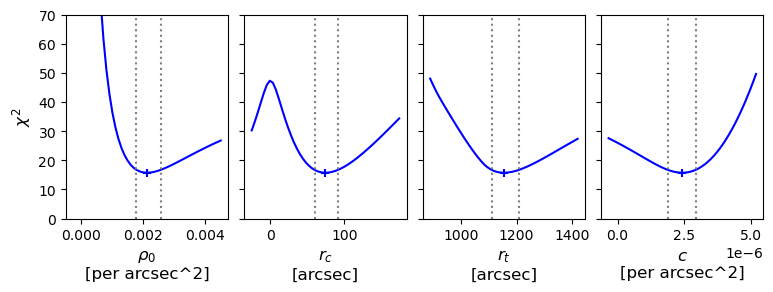

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cluster Name: IC_2395
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Parameter Ranges for Grid:  [[-2.9183154340638233e-05, 0.00028457550734550677], [-2621.3499450929203, 5868.052045390986], [2029.0203507328056, 3823.171336864211], [-2.4408219746036826e-07, 7.994417038426707e-07]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MLE of rho_0: 0.0
----------------------------------------------------------------------
MLE of r_c: 1623.351
----------------------------------------------------------------------
MLE of r_t: 2926.096
----------------------------------------------------------------------
MLE of c: 0.0
----------------------------------------------------------------------


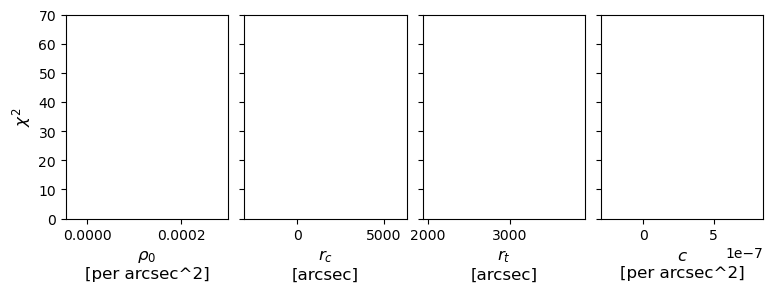

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cluster Name: FoF_2117
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Parameter Ranges for Grid:  [[0.0004319893387001007, 0.0010701693835391433], [83.63327780739945, 463.20727816723735], [1406.0262388426695, 1971.6475439109595], [1.4633406800889903e-07, 1.1002655479562476e-05]]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MLE of rho_0: 0.001
with Errors: [-0.  0.]
----------------------------------------------------------------------
MLE of r_c: 273.42
with Errors: [-34.747  38.677]
----------------------------------------------------------------------
MLE of r_t: 1688.837
with Errors: [-53.881  71.047]
----------------------------------------------------------------------
MLE of c: 0.0
with Errors: [-0.  0.]
----------------------------------------------------------------------


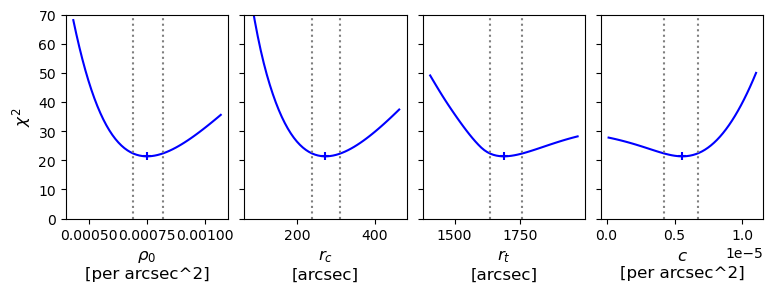

In [22]:
#NOTE: Due to the "oddness" of the IC_2395 CLUSTER in this part of the code we
#skip the error calculations for that cluster.
#To skip the error calculations, we use if statements.
#If the cluster name is "IC_2395" it will skip the error calculation and also
#printing parts.

###################### THIS PART IS SAME AS MODEL FITTING #####################
#We define our Fit Model, which is the King-Model.
model = King_Profile

#Now we say that our output should be residual as follows.
output_residual = True

#For the next steps, we need to do a fit to all the clusters.
#For that reason we will be in a loop for the following steps.
cluster_names = ["NGC_6645", "IC_2395", "FoF_2117"]

for name in cluster_names:
    #We get the histogram for our Cluster.
    counts, edges = star_num_density_hist(clusters_df, stars_df, name)

    #We rebin the histogram for our Cluster.
    star_counts, bin_edges = histogram_rebin(20, counts, edges)
    
    #We get the star densities and radii values.
    star_densities, radii, yerr, xerr = stellar_density_profile(clusters_df, 
                                        stars_df, name, include_errors = True)
    
    #We define the results we get from the function as our datasets as follows.
    xdata = [bin_edges]
    ydata = [star_densities]
    yerror = [yerr]

    #We first define the Parameters.
    Parameters_Fit = Parameters()

    #We add our parameters to our Parameters_Fit as follows.
    #Since the Radius values can not be a negative value we set the minimum
    #value for them to be zero.
        #rho_0:  Normalization Factor (we can estimate)
        #r_c: Core Radius of the Cluster (we can estimate)
        #r_t: Tidal Radius (where the cluster is truncated) (we can estimate)
        #c: Constant which corresponds to the Number Density of unassociated 
        #foreground/background stars. (we won't estimate exactly)
    
    #Critical Density/Normalization Factor is basically the peak of the profile.
    rho_0_initial = max(ydata[0])
    
    #Core Radius can be estimated with the Radius of the Maximum Density divided
    #by 2 as follows.
    max_density_index = np.unravel_index(np.argmax(ydata[0], axis=None), ydata[0].shape)
    r_c_initial = xdata[0][max_density_index] / 2
    
    #Tidal Radius can be estimated by checking where the decrease on the stellar 
    #density is a lot, so we can say that that's where the cluster is truncated.
    #We create a threshold for decrease.
    threshold_density = 0.02
    truncation_index = np.where(ydata[0] < threshold_density * np.max(ydata[0]))[0]
    r_t_initial = xdata[0][truncation_index][0]
    
    #For cluster IC_2395 there is a second bump. But our Fit does fitting only
    #for the first bump and not the second one. For that reason when we are
    #dealing with that cluster, we'll set c = 0 and keep it constant.
    #For other clusters, the fitting process works totally fine.
    if name == "IC_2395":
        Parameters_Fit.add_many(("rho_0", rho_0_initial, True, 0),
                                ("r_c", r_c_initial, True, 0),
                                ("r_t", r_t_initial, True, 0),
                                ("c", 1e-8, True, 0))
    
    else:
        Parameters_Fit.add_many(("rho_0", rho_0_initial, True, 0),
                                ("r_c", r_c_initial, True, 0),
                                ("r_t", r_t_initial, True, 0),
                                ("c", 1e-8, True, 0))
    
    #We now define our fit function as follows.
    fit_function = Minimizer(lmfit_least_squares, Parameters_Fit, 
                   fcn_args = (xdata, ydata, yerror, model, output_residual),
                   nan_policy = "omit")
    
    #We get our results from the fit as follows.
    result = fit_function.minimize(method = "leastsq")
    
###############################################################################
    
    #We define the number of steps in our grids as follows.
    num_steps = 50
    
    #Now we will define the Ranges for each parameter.
    #Ranges should aim for a few times 1-sigma error estimated from covariance.
    #We can specify the range by hand or use the values from the original minimize 
    #result if its available.
    parameter_ranges = []
    
    #We define our parameter names. (Names of parameters in the Parameters object!)
    parameter_names = ["rho_0", "r_c", "r_t", "c"]
    
    #We now define ranges for all of the parameters.
    for i, par_name in enumerate(parameter_names):
        #Range min/max are: (Best-Fitting Value -/+ four times the estimated 1-sigma
        #error from variances). (diagonals of covariance matrix)
        #Using this we define the ranges as follows.
        parameter_min = result.params.valuesdict()[par_name] - 4 * np.sqrt(result.covar[i, i])
        parameter_max = result.params.valuesdict()[par_name] + 4 * np.sqrt(result.covar[i, i])
    
        #Now we define the range for the current parameter.
        parameter_ranges.append([parameter_min, parameter_max])

    #Now we print the Parameter Ranges for grid.
    print(70 * "~")
    print(f"Cluster Name: {name}")
    print(70 * "~")
    print("Parameter Ranges for Grid: ", parameter_ranges)
    print(70 * "~")
    
    #For convenience, when plotting we will store our results in arrays.
    #We will set those arrays up as follows.
    p_best = np.zeros(len(parameter_ranges))
    min_chi_sq = np.zeros(len(parameter_ranges))
    p_grid = np.zeros((len(parameter_ranges), num_steps))
    chi_sq_grid = np.zeros((len(parameter_ranges), num_steps))
    p_int = np.zeros((len(parameter_ranges),2))
    
    #Since we want 1-sigma errors for a single parameter we define the following.
    delta_chi_sq = 1.0

    #Now we do the grid calculation for each parameter.
    for i, p_range in enumerate(parameter_ranges):
        #We define our Parameters object.
        parameters = Parameters()
    
        #We add our parameters into the Parameters object.
        #Again we make an exception for IC_2395 Cluster.
        
        if name == "IC_2395":
            parameters.add_many(("rho_0", rho_0_initial, True, 0),
                                ("r_c", r_c_initial, True, 0),
                                ("r_t", r_t_initial, True, 0),
                                ("c", 1e-8, True, 0))
    
        else:
            parameters.add_many(("rho_0", rho_0_initial, True, 0),
                                ("r_c", r_c_initial, True, 0),
                                ("r_t", r_t_initial, True, 0),
                                ("c", 1e-8, True, 0))
    
        #Now we calculate p_best, min_chi_sq, p_grid and chi_sq_grid as follows.
        p_best[i], min_chi_sq[i], p_grid[i, :], chi_sq_grid[i, :] = grid1D_chisquare_minimize(parameter_names[i],
                                                                    p_range, num_steps, parameters, model,
                                                                    xdata, ydata, yerror)
    
        #Now we calculate the parameter intervals as follows.
        if name == "IC_2395":
            pass
        
        else:
            p_int[i, :] = calculate_error_chi_squared(delta_chi_sq, p_best[i],
                                                      min_chi_sq[i], p_grid[i, :],
                                                      chi_sq_grid[i, :])
    
        #Good presentation of results should round off MLE (Maximum Likelihood
        #Estimation) and Errors to an appropriate number of decimal places.
        #Here we choose 3 to demonstrate the symmetry of the errors.
        #We could've used 2 decimal places since that is consistent with the size
        #of the error bars.
        print("MLE of " + parameter_names[i] + ":", str(np.round(p_best[i],3)))
        
        if name == "IC_2395":
            pass
        
        else:
            print("with Errors:", str(np.round((p_int[i, :] - p_best[i]),3)))
            
        print(70 * "-")
    
    #Now we plot along with a cross to mark the MLE and dotted lines to show the
    #1-sigma intervals.
    
    #We define the labels.
    parameter_xlabels = [r"$\rho_{0}$" + "\n" + "[per arcsec^2]", r"$r_{c}$" + "\n" + "[arcsec]", r"$r_{t}$" + "\n" + "[arcsec]", r"$c$" + "\n" + "[per arcsec^2]"]
    
    #We create our figure and axes.
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (9,3), sharey = True)
    
    fig.subplots_adjust(left = None, bottom = 0.2, right = None, top = None,
                        wspace = 0.1, hspace = None)

    #Now we plot all of the parameters with a loop.
    for i, ax in enumerate([ax1, ax2, ax3, ax4]):
        ax.plot(p_grid[i, :], chi_sq_grid[i, :], color = "blue")
        ax.scatter(p_best[i], min_chi_sq[i], marker = "+", color = "blue")
        if name == "IC_2395":
            pass
        
        else:
            ax.vlines(p_int[i, :], ymin = 0, ymax = 100, color = "gray", linestyle = "dotted")
        ax.set_xlabel(parameter_xlabels[i], fontsize = 12)

    ax1.set_ylabel(r'$\chi^{2}$',fontsize=12)
    ax1.set_ylim(0, 70)
    plt.show()

## Comments:

### King Model Fitting to the Stellar Density Profiles:
* We see that for **NGC 6645 and FoF 2117** clusters we get a pretty good looking King Model Fit.
* Of course, to make sure that the fit is actually good we need to check the **goodness of fit** and also **reduced chi-square** value!
    * If the goodness of fit is over 0 (e.g. 0.2, 0.5 etc until 1) it means that our fit is good!
    * If the reduced chi-square is around 1, it means that our fit is also good.

* **For NGC 6645:** The goodness of fit is 0.072 with reduced chi-square value of 1.75 which tells us that our fit is a good fit.
* **For FoF 2117:** The goodness of fit is 0.210 with reduced chi-square value of 1.25 which tells us that our fit is a good fit. (**Better than our fit for NGC 6645**)

* As for the cluster **IC 2395** we have discussed about the unexpected "two bump" structure on the stellar density profile of that cluster before in Task 2.
* Due to this bump and uncommon characteristic of the cluster, our fit for the cluster **IC 2395** is not good by any means.
* A lot of different initial values have been tried for that cluster but none of them satisfied the conditions for a good fit. (Also asked our lecturer Phil and he has confirmed that the "King Model" fit for this cluster is a bad one.)
* **For IC 2395**: The goodness of fit is 1.376e-28 with reduced chi-square value of 14.54 which tells us that our fit is a **bad** fit.
    * The double bump structure of this cluster could mean that there is another "structure" inside our cluster that causes the number of stars on that radius to increase.

### Most Likelihood Estimators (MLEs)

* **For NGC 6645**:
    * Compared to our results from the King Model fit $\rho_0$, $r_c$, $r_t$ and $c$ all make sense.
    * However, we can see that the errors we got from MLE are at much better intervals, compared to our King Model fit, with around 1-$\sigma$ confidence.

* **For FoF 2117**:
    * Compared to our results from the King Model fit $\rho_0$, $r_c$, $r_t$ and $c$ all make sense.
    * However, again we can see that the errors we got from MLE are at much better intervals, compared to our King Model fit, with around 1-$\sigma$ confidence.

* **For IC 2395**:
    * We can only get the MLEs but we can't get the errors calculated.
    * The code gave an "interpolation" error when running it for the IC 2395 Cluster.
    * For that reason, we skip the error calculation part for this cluster.
    * But the code also does not give any plots back for IC 2395.
    * For that reason, I left it as it is and I believe this is due to the oddness of this cluster and our bad fit with the King Model proves that.

# Task 3:

* An interesting question is whether or not the stars in a cluster follow the **same stellar density profiles when they are selected according to different properties**.
* **In particular, we would like to see if the populations are well mixed according to:**
    * 1-) **Their G Band Magnitude**
    * 2-) **Their Absolute Proper Motion** (Combining RA and DE Proper Motion Directions)

* If they are well-mixed:
    * **Subsamples selected on the given quantity will show similar density profiles.**

* **For each of these 2 quantities:**
    * **Split the stars from each cluster into 2 subsamples corresponding to different percentile ranges** (your choice) **of the given observable quantity.**

* **Then for each cluster:**
    * **Fit the resulting 2 density profiles together!**
    * **Determine whether the Stellar Density Profile Model Parameters depend on the chosen quantity.**

## Assumptions:
* 1-) Since Data/Star count is high, we may consider our errors to be normally distributed (if it weren't, they would be poisson distributed).
* 2-) Due to the bins having a lot of star/data counts, according to Central Limit Theorem (CLT) we may assume that the histogram distribution to be normally distributed.
* 3-) For MLE we need the assumption that the data is **i.i.d (Independent and Identically Distributed)!**
* 4-) This means that the observation data we have are independent from one another and also drawn from the same distribution!

In [23]:
#For the Subsampling we'll define two separate functions.
    #One function for G Band Sampling.
    #One function for Absolute Proper Motion sampling.

### Percentiles:
* Let's discuss percentiles first before we move further.
* We need to sort **data points in ascending order** before we use percentiles.
* **Percentiles basically divide dataset into 100 equal parts.**
    * Which means that the 50th Percentile is the median of the dataset!

* **Percentile Range:**
    * It is the range between two percentiles.
    * **For example let's assume 20th Percentile Range:**
        * **This means that we get the interval between the values:**
            * 1-) Below which 20% of the data falls.
            * 2-) Above which 80% of the data falls.
            * 3-) **We essentially select the interval that captures the middle %20 of the data!**
            * 4-) **This leaves out the lower and upper %40 of the data on each side!**

* **As another example:**
    * We will split our datas into 2 subsamples using 30% percentile range!
    * This means that we will find the **threshold values for the lower and upper percentiles.**
        * 1-) **Data points below their lower threshold will be included in the lower subsample.** (30% and lower)
        * 2-) **Data points above their upper threshold will be included in the higher/upper subsample.** (%70 and higher)
        * 3-) **Data points between 2 thresholds are excluded from both subsamples!** (between %30 and %70 percentiles)

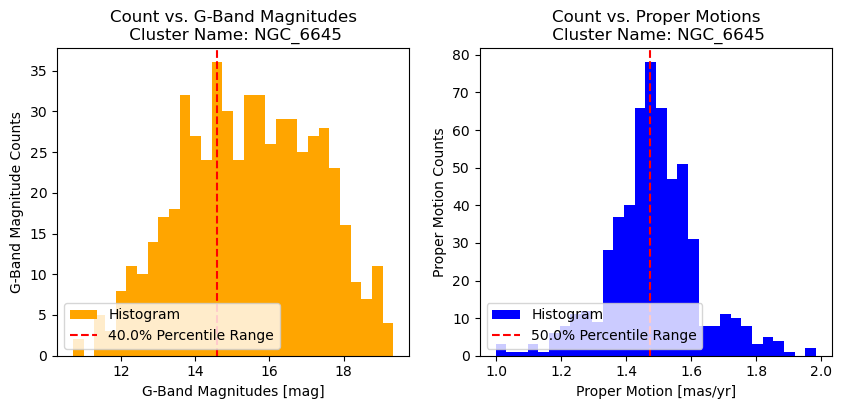

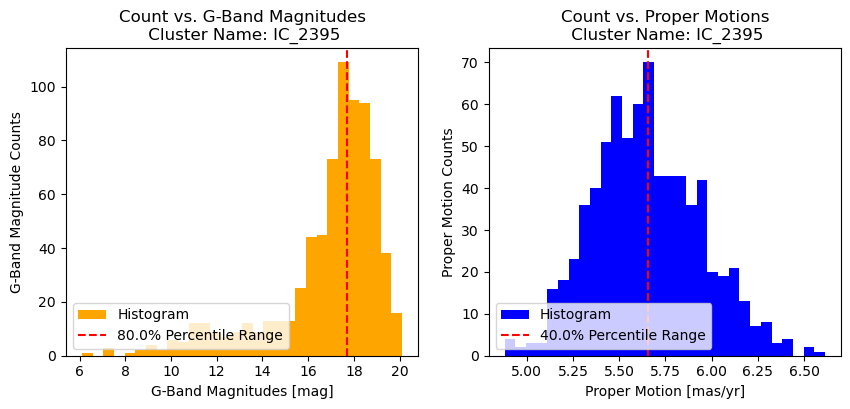

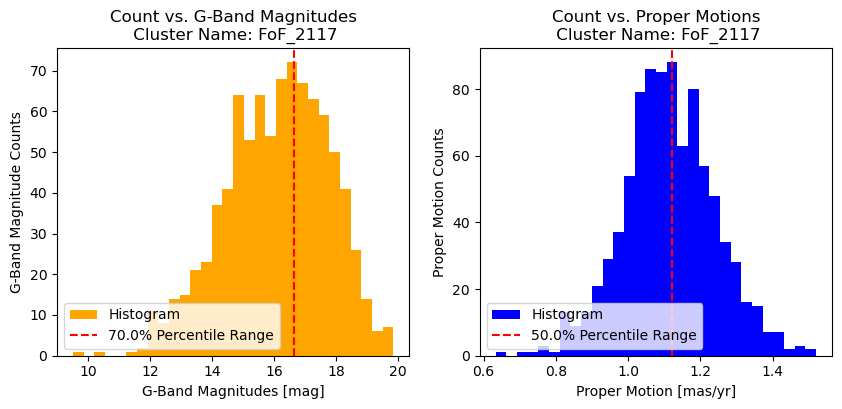

In [24]:
#To find the suitable Percentile Range we first need to check the histograms of
#G Band and Proper Motion Values for each cluster.
#For this we can define the following function.
def percentile_ranges(stars_df, cluster_name, plot_results = False):
    """Takes the Cluster DataFrame, Star DataFrame, Cluster's name. Returns
    the histograms of G-Band Magnitudes and Proper Motions alongside the
    Percentile Range suitable for those Astrometric quantities for that cluster.
    
    Input:
    ----------------------------------------------------------------------------
    stars_df: Stars DataFrame (containing "Radial Separation" column).
    cluster_name: Name of the Cluster we are interested in.
    plot_results: Boolean that decides whether to plot the Histograms or not.
    
    Output:
    ----------------------------------------------------------------------------
    g_band_percentile_range: Percentile Range value for G Band Magnitudes. 
    pm_percentile_range: Percentile Range value for Proper Motions.
    if plot_results == True: The Histograms of both Astrometric Quantities and
    their Peak alongside the Percentile Range value will be plotted.
    
    """
    
    #We get the stars from our cluster.
    cl_stars = stars_df[stars_df["Name"] == cluster_name]
    
    ########################### FOR G-BAND MAGNITUDES #########################
    
    #We get the G Mag values and the Proper Motion Values as follows.
    g_band_cl_stars = cl_stars["Gmag"]
    
    #Now we get the histogram for G Band Magnitudes.
    g_band_counts, g_band_bin_edges = np.histogram(g_band_cl_stars, bins = 30)
    
    #We find the bin centers as follows.
    g_band_bin_centers = (g_band_bin_edges[ : -1] + g_band_bin_edges[1 : ]) / 2
    
    #We now find the bin where the peak of this histogram is i.e. the maximum 
    #G-Band Magnitude count as follows.
    bin_peak = np.argmax(g_band_counts)
    
    #Now we calculate the Cumulative Distribution Function CDF since we need it
    #to see which bin edges correspond to which percentiles.
    cdf = np.cumsum(g_band_counts) / np.sum(g_band_counts)
    
    #Now we find/define the percentiles that correspond to each bin edge.
    g_band_percentiles = np.linspace(0, 1, len(g_band_bin_edges))
    
    #Now we can get the percentile for our peak which will be our percentile
    #range.
    g_band_percentile_range = g_band_percentiles[bin_peak]
    g_band_percentile_range = round(g_band_percentile_range, 1) * 100
    
    if plot_results == True:
        #We first define a figure.
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
        
        #We plot the resulting histogram to see how it looks.
        ax1.hist(g_band_bin_centers, bins = 30, weights = g_band_counts, color = "orange", label = "Histogram")
        ax1.set_title(r"Count vs. G-Band Magnitudes" + f"\n Cluster Name: {cluster_name}")
        ax1.set_xlabel("G-Band Magnitudes [mag]")
        ax1.set_ylabel(f"G-Band Magnitude Counts")
        ax1.axvline(x = g_band_bin_centers[bin_peak], color = "red", linestyle = "--", 
                    label = f"{g_band_percentile_range}% Percentile Range")
        ax1.set_xscale("linear")
        ax1.set_yscale("linear")
        ax1.legend(loc = "lower left")
        
    ############################ FOR PROPER MOTIONS ###########################
    
    #We first calculate the Proper Motion Values as follows.
    pm_RA = cl_stars["pmRA"]
    pm_DE = cl_stars["pmDE"]
    pm_cl_stars = np.sqrt((pm_RA ** 2) + (pm_DE ** 2))
    
    #Now we get the histogram for G Band Magnitudes.
    pm_counts, pm_bin_edges = np.histogram(pm_cl_stars, bins = 30)
    
    #We find the bin centers as follows.
    pm_bin_centers = (pm_bin_edges[ : -1] + pm_bin_edges[1 : ]) / 2
    
    #We now find the bin where the peak of this histogram is i.e. the maximum 
    #G-Band Magnitude count as follows.
    bin_peak = np.argmax(pm_counts)
    
    #Now we calculate the Cumulative Distribution Function CDF since we need it
    #to see which bin edges correspond to which percentiles.
    cdf = np.cumsum(pm_counts) / np.sum(pm_counts)
    
    #Now we find/define the percentiles that correspond to each bin edge.
    pm_percentiles = np.linspace(0, 1, len(pm_bin_edges))
    
    #Now we can get the percentile for our peak which will be our percentile
    #range.
    pm_percentile_range = pm_percentiles[bin_peak]
    pm_percentile_range = round(pm_percentile_range, 1) * 100
    
    if plot_results == True:
        #We plot the resulting histogram to see how it looks.
        ax2.hist(pm_bin_centers, bins = 30, weights = pm_counts, color = "blue", label = "Histogram")
        ax2.set_title(r"Count vs. Proper Motions" + f"\n Cluster Name: {cluster_name}")
        ax2.set_xlabel("Proper Motion [mas/yr]")
        ax2.set_ylabel(f"Proper Motion Counts")
        ax2.axvline(x = pm_bin_centers[bin_peak], color = "red", linestyle = "--", 
                    label = f"{pm_percentile_range}% Percentile Range")
        ax2.set_xscale("linear")
        ax2.set_yscale("linear")
        ax2.legend(loc = "lower left")
        plt.show()
        
    return g_band_percentile_range, pm_percentile_range

#Now we check all of the cluster histograms to see what the Percentile Ranges
#are as follows.
for name in cluster_names:
    g_band_percentile_range, pm_percentile_range = percentile_ranges(stars_df, name, plot_results = True)

In [25]:
#We start with the G Band Sampling, for that we define the following function.
def g_band_samples(stars_df, cluster_name, percentile_range):
    """Takes Stars DataFrame, the Cluster's Name and the Percentile Range. 
    Returns two G Band Magnitude subsamples that have their thresholds defined 
    by the percentile range.
    
    Input:
    ----------------------------------------------------------------------------
    stars_df: Stars DataFrame (containing "Radial Separation" column).
    cluster_name: Name of the Cluster we are interested in.
    percentile_range: The percentile range that splits the data into two,
    captures the middle percentile of the data with the subsamples.
    
    Output:
    ----------------------------------------------------------------------------
    g_band_low: The lower percentile subsample for G Band Magnitudes.
    g_band_high: The higher percentile subsample for G Band Magnitudes.
    
    Example:
    ----------------------------------------------------------------------------
    percentile_range = 30 => Leaves middle %30 of the data.
    g_band_low => Captures the data points below %30.
    g_band_high => Captures the data points above %70.
    
    """

    #We get the stars from our cluster.
    cl_stars = stars_df[stars_df["Name"] == cluster_name]
    
    #Now we calculate our percentile threshold depending on the percentile 
    #range we get from the percentile_range argument.
    #For this we can use the np.percentile() function from numpy.
    lower_threshold = np.percentile(cl_stars["Gmag"], percentile_range)
    upper_threshold = np.percentile(cl_stars["Gmag"], 100 - percentile_range)
    
    #Now we create two subsamples according to our thresholds as follows.
    g_band_low = cl_stars[cl_stars["Gmag"] <= lower_threshold]
    g_band_high = cl_stars[cl_stars["Gmag"] >= upper_threshold]
    
    return g_band_low, g_band_high

#We get our subsamples, as an example for NGC_6645, as follows.
g_band_percentile_range, pm_percentile_range = percentile_ranges(stars_df, "NGC_6645", plot_results = False)
g_band_low, g_band_high = g_band_samples(stars_df, "NGC_6645", g_band_percentile_range)

In [26]:
#Now we do the same for the Absolute Proper Motion values.
def proper_motion_samples(stars_df, cluster_name, percentile_range):
    """Takes Stars DataFrame, the Cluster's Name and the Percentile Range. 
    Returns two Proper Motion subsamples that have their thresholds defined 
    by the percentile range.
    
    Input:
    ----------------------------------------------------------------------------
    stars_df: Stars DataFrame (containing "Radial Separation" column).
    cluster_name: Name of the Cluster we are interested in.
    percentile_range: The percentile range that splits the data into two,
    captures the middle percentile of the data with the subsamples.
    
    Output:
    ----------------------------------------------------------------------------
    proper_motion_low: The lower percentile subsample for G Band Magnitudes.
    proper_motion_high: The higher percentile subsample for G Band Magnitudes.
    
    Example:
    ----------------------------------------------------------------------------
    percentile_range = 30 => Leaves middle %30 of the data.
    proper_motion_low => Captures the data points below %35.
    proper_motion_high => Captures the data points above %65.
    
    """
    
    #We get the stars from our cluster.
    cl_stars = stars_df[stars_df["Name"] == cluster_name]
    
    #We first need to calculate the Proper Motions.
    #For this we first get the pmRA and pmDE values from cl_stars.
    pm_RA = cl_stars["pmRA"]
    pm_DE = cl_stars["pmDE"]
    
    #Now we calculate the Proper Motions as follows.
    proper_motions = np.sqrt((pm_RA ** 2) + (pm_DE ** 2))
    
    #We add the Proper Motions into our cl_stars DataFrame to split them using
    #percentile range in the following steps.
    cl_stars["Proper Motion"] = proper_motions
    
    #Now we calculate our percentile threshold depending on the percentile 
    #range we get from the percentile_range argument.
    #For this we can use the np.percentile() function from numpy.
    lower_threshold = np.percentile(cl_stars["Proper Motion"], percentile_range)
    upper_threshold = np.percentile(cl_stars["Proper Motion"], 100 - percentile_range)
    
    #Now we create two subsamples according to our thresholds as follows.
    proper_motion_low = cl_stars[cl_stars["Proper Motion"] <= lower_threshold]
    proper_motion_high = cl_stars[cl_stars["Proper Motion"] >= upper_threshold]
    
    return proper_motion_low, proper_motion_high

#We get our subsamples, as an example for NGC_6645, as follows.
g_band_percentile_range, pm_percentile_range = percentile_ranges(stars_df, "NGC_6645", plot_results = False)
proper_motion_low, proper_motion_high = proper_motion_samples(stars_df, "NGC_6645", pm_percentile_range)

C:\Users\kayah\AppData\Local\Temp\ipykernel_12532\1509190603.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_stars["Proper Motion"] = proper_motions


In [27]:
#Now we will define a function for plotting the Stellar Density Profiles (SDP)
#of 2 subsamples of G Band Magnitudes and Proper Motions.
def plot_subsample_SDP(g_band_low, g_band_high, 
                       proper_motion_low, proper_motion_high, 
                       clusters_df, name, g_band_percentile_range,
                       pm_percentile_range, plot_results = False,
                       get_results = False):
    """Takes the Subsamples of G Band Magnitudes and Proper Motions. Also takes
    the name of the Cluster and the Percentile Ranges (only for the plot title
    and labels). Returns the plots comparing the Stellar Density Profiles of 
    Subsamples of G Band Magnitudes and Proper Motions.
    
    Input:
    ----------------------------------------------------------------------------
    g_band_low: The lower percentile subsample for G Band Magnitudes.
    g_band_high: The higher percentile subsample for G Band Magnitudes.
    proper_motion_low: The lower percentile subsample for G Band Magnitudes.
    proper_motion_high: The higher percentile subsample for G Band Magnitudes.
    name: Name of the Cluster we are interested in.
    g_band_percentile_range: The percentile range for G Band Magnitudes.
    pm_percentile_range: The percentile range for Proper Motions.
    plot_results: Boolean that decides whether to plot the Histograms or not.
    get_results: Boolean that decides whether to get the bin edges, count den-
    sities and errors or not.
    
    Output:
    ----------------------------------------------------------------------------
    if plot_results == True: Stellar Density Profile plot of two Subsamples of 
    G Band Magnitudes and Stellar Density Profile plot of two Subsamples of 
    Proper Motions.
    if get_results == True: Returns the lists of bin edges, count densities,
    bin errors and count density errors for both samples of G Band Magnitudes
    and Proper Motions.
    
    Note:
    ----------------------------------------------------------------------------
    if get_results == True, the returned lists contain the results for the given
    Astrometric Quantity's both subsamples as two arrays. To reach the first
    subsample's results we have to use index [0].
    
    
    """
    
    #We first get the bin_centers for all of our subsamples by using our 
    #function from Task 1: stellar_density_profile().
    #(This is needed to plot the errors and data!)
    bin_edges_gband_1 = stellar_density_profile(clusters_df, g_band_low, name,  return_bin_edges = True)
    bin_edges_gband_2 = stellar_density_profile(clusters_df, g_band_high, name, return_bin_edges = True)
    bin_edges_pm_1 = stellar_density_profile(clusters_df, proper_motion_low, name, return_bin_edges = True)
    bin_edges_pm_2 = stellar_density_profile(clusters_df, proper_motion_high, name, return_bin_edges = True)

    #We get the star densities and radii from the subsamples by using our 
    #function from Task 1: stellar_density_profile()
        # 1-) Star Densities & Radii Values & Errors for G Band Low Subsample.
        # 2-) Star Densities & Radii Values & Errors for G Band High Subsample.
        # 3-) Star Densities & Radii Values & Errors for Proper Motion Low 
        #Subsample.
        # 4-) Star Densities & Radii Values & Errors for Proper Motion High
        #Subsample.
    star_densities_gband_1, radii_gband_1, yerr_gband_1, xerr_gband_1 = stellar_density_profile(clusters_df, g_band_low,
                                                                                                name, include_errors = True)
    star_densities_gband_2, radii_gband_2, yerr_gband_2, xerr_gband_2 = stellar_density_profile(clusters_df, g_band_high,
                                                                                                name, include_errors = True)
    star_densities_pm_1, radii_pm_1, yerr_pm_1, xerr_pm_1 = stellar_density_profile(clusters_df, proper_motion_low,
                                                                                    name, include_errors = True)
    star_densities_pm_2, radii_pm_2, yerr_pm_2, xerr_pm_2 = stellar_density_profile(clusters_df, proper_motion_high,
                                                                                    name, include_errors = True)
    #Now we plot the subsamples as follows.
    
    ########################### FOR G-BAND MAGNITUDES #########################
   
    if plot_results == True:
        #Now we create our Stellar Density Profile plot as follows.
        plt.figure(figsize = (8, 6))
    
        #Now we also plot our errorbars as follows.
        plt.errorbar(radii_gband_1, star_densities_gband_1, xerr = xerr_gband_1,
                     yerr = yerr_gband_1, fmt = "o", color = "blue", ecolor = "red",
                     label = f"G Band Magnitude Subsample 1 (< %{g_band_percentile_range})")
    
        plt.errorbar(radii_gband_2, star_densities_gband_2, xerr = xerr_gband_2,
                     yerr = yerr_gband_2, fmt = "o", color = "orange", ecolor = "green",
                     label = f"G Band Magnitude Subsample 2 (> %{100 - g_band_percentile_range})")
    
        #We create our Labels and Titles.
        plt.title(r"Stellar Density Profile vs. Radius (log-scale)" + 
                  f"\n Using G Band Magnitudes with Percentile of %{g_band_percentile_range}" + 
                  f"\n Cluster Name: {name}")
        plt.xlabel("Distance from the Center [arcsec] (in log)")
        plt.ylabel(f"Stellar Number Density\n [per arcsec$^{2}$] (in log)")
    
        #We change the axis scales to logarithm.
        plt.xscale("log")
        plt.yscale("log")
    
        #We add a legend.
        plt.legend()
        
        #We show the plot.
        plt.show()

    ############################ FOR PROPER MOTIONS ##########################
    
    if plot_results == True:
        #Now we create our Stellar Density Profile plot as follows.
        plt.figure(figsize = (8, 6))
    
        #Now we also plot our errorbars as follows.
        plt.errorbar(radii_pm_1, star_densities_pm_1, xerr = xerr_pm_1,
                     yerr = yerr_pm_1, fmt = "o", color = "blue", ecolor = "red",
                     label = f"Proper Motion Subsample 1 (< %{pm_percentile_range})")
    
        plt.errorbar(radii_pm_2, star_densities_pm_2, xerr = xerr_pm_2,
                     yerr = yerr_pm_2, fmt = "o", color = "orange", ecolor = "green",
                     label = f"Proper Motion Subsample 2 (> %{100 - pm_percentile_range})")
    
        #We create our Labels and Titles.
        plt.title(r"Stellar Density Profile vs. Radius (log-scale)" + 
                  f"\n Using Proper Motions with Percentile of %{pm_percentile_range}" + 
                  f"\n Cluster Name: {name}")
        plt.xlabel("Distance from the Center [arcsec] (in log)")
        plt.ylabel(f"Stellar Number Density\n [per arcsec$^{2}$] (in log)")
    
        #We change the axis scales to logarithm.
        plt.xscale("log")
        plt.yscale("log")
    
        #We add a legend.
        plt.legend(loc = "lower left")
        
        #We show the plot.
        plt.show()
    
    ################################## RESULTS ################################
    
    #Now we group everything we need on our fitting into lists.
    #We need the bin values, count densities, bin errors and count density 
    #errors for both g-band and proper motion subsamples.
    #For this we do the following.
    bin_edges_gband = [bin_edges_gband_1, bin_edges_gband_2]
    bin_edges_pm = [bin_edges_pm_1, bin_edges_pm_2]
    
    star_densities_gband = [star_densities_gband_1, star_densities_gband_2]
    star_densities_pm = [star_densities_pm_1, star_densities_pm_2]
    
    xerr_gband = [xerr_gband_1, xerr_gband_2]
    xerr_pm = [xerr_pm_1, xerr_pm_2]
    
    yerr_gband = [yerr_gband_1, yerr_gband_2]
    yerr_pm = [yerr_pm_1, yerr_pm_2]
    
    if get_results == True:
        return (bin_edges_gband, bin_edges_pm, star_densities_gband, 
                star_densities_pm, xerr_gband, xerr_pm, yerr_gband,
                yerr_pm)
    
    else:
        return

In [28]:
#Now we define a new function "Bin Model Multiple" which integrates over bins.
def bin_model_multiple(xbins, model, i_data, parameters):
    """General function for integrating the input Model over bins defined by
    continous (no gaps) bin edges i.e. xbins
    
    Input:
    ----------------------------------------------------------------------------
    xbins: x axis bin edges.
    model: The model name.
    i_data: The Dataset being considered. (Determines which parameters to use
    in the model!)
    parameters: The associated Parameters object.
    
    Output:
    ----------------------------------------------------------------------------
    y_model: Calculated Counts-Density Model values for y-axis.
    
    """
    
    #We define a count.
    i = 0
    
    #We define the Count-Density Model values as an array.
    y_model = np.zeros(len(xbins)-1)
    
    #We now do a loop to integrate over bins and dividing the result with bin
    #width.
    for i, xval in enumerate(xbins[ : -1]):
        #We do the integration over the bin. (lambda is a "small function")
        y_model[i], y_model_err = spint.quad(lambda x: model(x, i_data, parameters), xbins[i], xbins[i+1])
        
        #We divide it with the bin width as follows.
        y_model[i] = y_model[i] / (xbins[i+1] - xbins[i])
    
    return y_model

In [29]:
#We do the same for our lmfit_least_squares function.
def lmfit_least_squares_multiple(parameters, xdata, ydata, yerror, model, output_residual = True):
    """lmfit objective function to calculate and return the Residual Array or
    Model y-values for Binned Data, where the xdata are the input bin edges and
    ydata are the densities (i.e. integral over bin divided by bin width).
    
    Input:
    ----------------------------------------------------------------------------
    parameters: Name of lmfit Parameters object set up for the fit.
    xdata: Bin Edges. (Not Bin Centers!) => To be fitted
    ydata: Count Densities. (Integral over bin / bin width) => To be fitted
    yerror: Errors on Count Densities. => To be fitted
    model: The name of the Model Funtion to be used. (Must take parameters as 
    its input parameters and return the model y-value array for a given x-value
    array!)
    output_resudial: Boolean set to True if the lmfit objective function
    (residuals) is required output, otherwise a list of model y-value arrays
    (corresponding to the input x-data list) is returned.
    
    Output:
    ----------------------------------------------------------------------------
    residual:
        If output_residual == True: The function Returns a residual array of
    (y_i - y_model(x_i))/y_err_i which is concatenated into a single array
    for all input data errors. (i.e. length is n1 + n2 in the example below.)
    
    y_model:
        If output_residual == False: Returns a list of y-model arrays. (one per
    input x-array.)
    
    Example:
    ----------------------------------------------------------------------------
    For 2 datasets to be fitted simultaneously:
        xdata = [x1, x2]
        ydata = [y1, y2]
        yerrs = [err1, err2]
    
    In here x1, y1, err1 and x2, y2, err2 are the "data" sets of 1-D arrays of
    length n1 and n2 respectively. 
        Length is n1+1 for x1 since it is binedges!
        Length is n2+2 for x2 since it is binedges!
    
    Note: A single Data Set should also be given via a list, i.e. xdata = [x1],
    ydata = [y1], yerr = [err1].
    
    """
    
    if output_residual == True:
        #We loop through each input dataset (lists) and record residual array.
        for i, xvals in enumerate(xdata):
            if i == 0:
                residual = (ydata[i] - bin_model_multiple(xdata[i], model, i+1, parameters)) / yerror[i]
            
            else:
                residual = np.append(residual, (ydata[i] - bin_model_multiple(xdata[i], model, i+1, parameters)) / yerror[i])
            
        return residual
    
    else:
        y_model = []
        #We record a list of model y-value arrays, one per input Dataset.
        for i, xvals in enumerate(xdata):
            y_model.append(bin_model_multiple(xdata[i], model, i+1, parameters))
        
        return y_model

In [30]:
#We first define a function for our King-Profile.
def King_Profile_Multiple(radius, i_data, parameters):
    """Takes the parameters and returns the appropriate equation depending on
    the conditions that is defined for King Model.
    
    Input:
    ----------------------------------------------------------------------------
    radius: The radius of the cluster "circle" we are in.
    i_data: Index of the Dataset.
    parameters: lmfit Parameters Object that contains the following:
        rho_0: Normalization factor.
        r_c: Core radius of the cluster.
        r_t: Tidal Radius of the cluster. (Where the cluster is truncated)
        c: Constant which corresponds to the Number Density of unassociated
        foreground & background stars.
    
    Output:
    ----------------------------------------------------------------------------
    rho_king: Stellar Density Model at given Radius of the cluster.
    
    """
    
    #We get our parameters.
    p = parameters.valuesdict()
    
    if radius <= p["r_t_" + str(i_data)]:
        rho_king = (p["rho_0_" + str(i_data)] * ((1/np.sqrt(1 + (radius/p["r_c_" + str(i_data)])**2)) - (1/np.sqrt(1 + (p["r_t_" + str(i_data)]/p["r_c_" + str(i_data)])**2)))) + p["c_" + str(i_data)]
    
    else:
        rho_king = p["c_" + str(i_data)]
    
    return rho_king

In [31]:
#We create a function that plots out the comparison of our data and fit model.
def plot_model_multiple(energybinedges, count_densities, count_densities_err, 
                        count_densities_model, residual_type, 
                        legend_labels, quantity_name, cluster_name):
    """Plot the binned Stellar Number Density with the model as a histogram and 
    Data/Model residuals.
    
    Input:
    ----------------------------------------------------------------------------
    energybinedges: Energy bin edges.
    count_densities: Count Densities.
    count_densities_err: Count Density Errors.
    count_densities_model: Model Count Densities.
    residual_type: String, type of Data vs Model residuals, these can be: 
        1-) "ratio": data/model 
        2-) "residual": data - model
        3-) "weighted residual": (data - model) / error
    
    legend_labels: List of labels for each dataset to use in legend, use None if
    no legend is required.
    quantity_name: Name of the Astrometric Quantity we are plotting for.
    cluster_name: Name of the Cluster we are plotting for.
    
    Output:
    ----------------------------------------------------------------------------
    Stepped Histogram Plot alongside the Data/Model Ratio Plot.
    
    """
    
    #We define our figure, note that it will have 2 separate plots combined
    #into one.
        #First Plot => Stellar Density Profiles
        #Second Plot => Data/Model Ratio or Data - Model or (Data - Model) / Error
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 6), sharex = True,
                                   gridspec_kw = {"height_ratios" : [2, 1]})
    
    #We adjust our subplots to have zero space between them horizontally.
    fig.subplots_adjust(hspace = 0)
    
    for i, energy_bin_edge_list in enumerate(energybinedges):
        #We get our energies from the energy bin edges.
        energies = (energy_bin_edge_list[1 : ] + energy_bin_edge_list[ : -1]) / 2
    
        #Now we get our bin widths as follows.
        bin_widths = np.diff(energy_bin_edge_list)
        
        #We check the legend_labels argument, if its not None and contains the
        #labels for each dataset, we do the following.
        if legend_labels != None:
            label_text = legend_labels[i]
        
        #Note that colours in the default Matplotlib Colour Cycle can be
        #specified using strings "C0", ..., "C9" which is useful for plotting
        #the same colours for Model and Data.
        #We plot the errorbars for the first plot.
        ax1.errorbar(energies, count_densities[i], xerr = bin_widths/2,
                     yerr = count_densities_err[i], color = "C" + str(i),
                     markersize = 4, fmt = "o", label = label_text)
    
        #We plot our first plot i.e. histogram.
        model_hist, edges, patches = ax1.hist(energies, bins = energybinedges[i],
                                              weights = count_densities_model[i],
                                              density = False, histtype = "step",
                                              color = "C" + str(i), alpha = 0.5,
                                              linestyle = "dotted", linewidth = 2)
        
        #Now we check the residual type to see what we will plot.
        #For this we do the following if statements.
        if residual_type == "ratio":
            #We plot the data and errors.
            ax2.errorbar(energies,
                         count_densities[i]/count_densities_model[i], 
                         xerr = bin_widths/2,
                         yerr = count_densities_err[i]/count_densities_model[i], 
                         color = "C" + str(i), markersize = 4, fmt = "o")
            
            #We define the labels and set the label locations.
            ax2.set_ylabel("data/model", fontsize = 14)
            
            #We plot a horizontal line that represents 1 (where the data and the
            #model are the same) as follows.
            ax2.axhline(1, color = "gray", linestyle = "dotted", lw = 2)
        
        elif residual_type == "residual":
            #We plot the data and errors.
            ax2.errorbar(energies,
                         (count_densities[i] - count_densities_model[i]), 
                         xerr = bin_widths/2,
                         yerr = count_densities_err[i], 
                         color = "C" + str(i), markersize = 4, fmt = "o")
            
            #We define the labels and set the label locations.
            ax2.set_ylabel("data-model", fontsize = 14)
            
            #We plot a horizontal line that represents 0 (where the data and the
            #model are the same) as follows.
            ax2.axhline(0, color = "gray", linestyle = "dotted", lw = 2)
        
        elif residual_type == "weighted residual":
            #We plot the data and errors.
            ax2.errorbar(energies,
                         (count_densities[i] - count_densities_model[i]) / count_densities_err[i], 
                         xerr = bin_widths/2,
                         yerr = 1.0, 
                         color = "C" + str(i), markersize = 4, fmt = "o")
            
            #We define the labels and set the label locations.
            ax2.get_yaxis().set_label_coords(-0.09, 0.5)
            ax2.set_ylabel(r"$\frac{data-model}{error}$", fontsize = 16)
            
            #We plot a horizontal line that represents 0 (where the data and the
            #model are the same) as follows.
            ax2.axhline(0, color = "gray", linestyle = "dotted", lw = 2)
        
        else:
            raise ValueError("Please write one of the following for the residual_type: 'ratio', 'residual' or 'weighted residual'.")
        
    #Now we plot the labels as follows.
    ax2.set_xlabel("Distance from the Center [arcsec] (in log)", fontsize = 14)
    ax1.set_ylabel(f"Stellar Number Density\n [per arcsec$^{2}$] (in log)", fontsize = 14)
    ax1.get_yaxis().set_label_coords(-0.12, 0.5)
    ax2.get_yaxis().set_label_coords(-0.12, 0.5)
    
    #We also plot the "ticks" on both plots' axes as follows.
    ax1.tick_params(labelsize = 14)
    ax1.tick_params(axis = "x", direction = "in", which = "both", length = 4)
    
    ax2.tick_params(axis = "x", which = "both", length = 4)
    ax2.tick_params(labelsize = 14)
    
    #Now we set all of the scales to log.
    ax1.set_yscale("log")
    ax1.set_xscale("log")
    ax2.set_xscale("log")
        
    #Now we finally set the xlimit on both the plots (since they share the same
    #x axis)
        #Note: We must show only the Energy Range where the data is samples to
        #avoid impression from model that the Flux suddenly drops at the end
        #of boundaries.
    ax2.set_xlim(energy_bin_edge_list[0], energy_bin_edge_list[-1])
    
    #We also plot a legend on our first plot.
    ax1.legend(fontsize = 14)
    
    #Finally, we name our plot.
    fig.suptitle(f"{quantity_name} Subsample vs. Model Comparison for Cluster {cluster_name}")
    
    plt.show()

C:\Users\kayah\AppData\Local\Temp\ipykernel_12532\1509190603.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_stars["Proper Motion"] = proper_motions


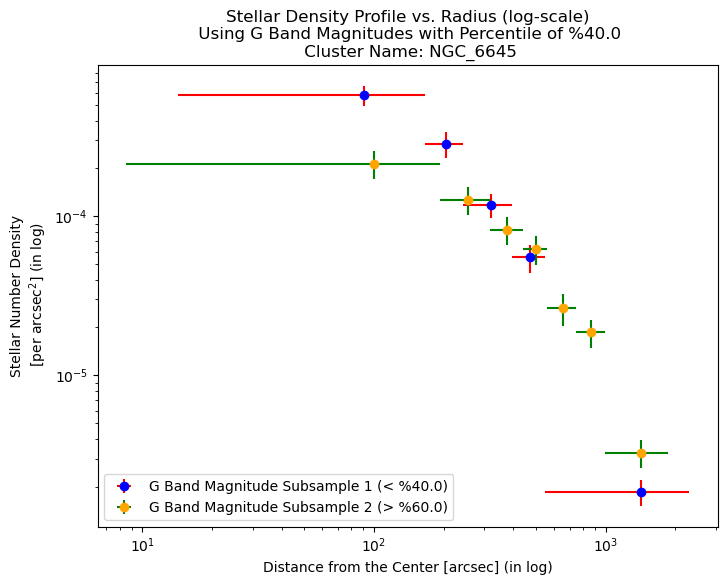

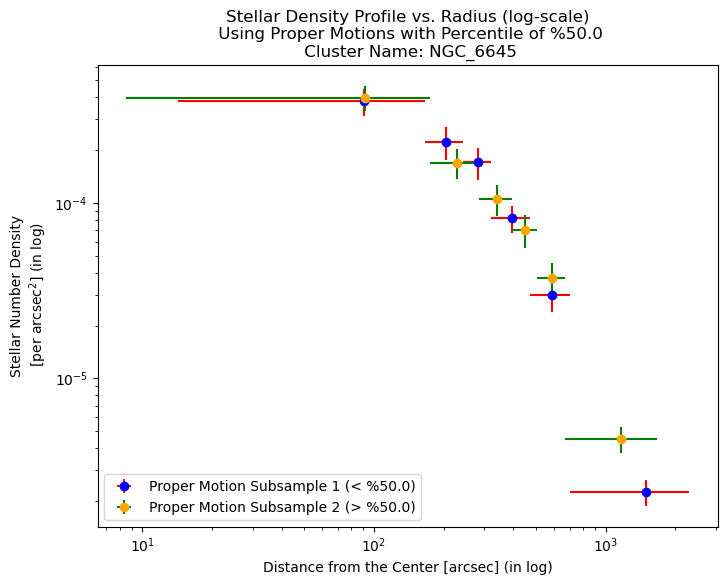

C:\Users\kayah\AppData\Local\Temp\ipykernel_12532\1509190603.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_stars["Proper Motion"] = proper_motions


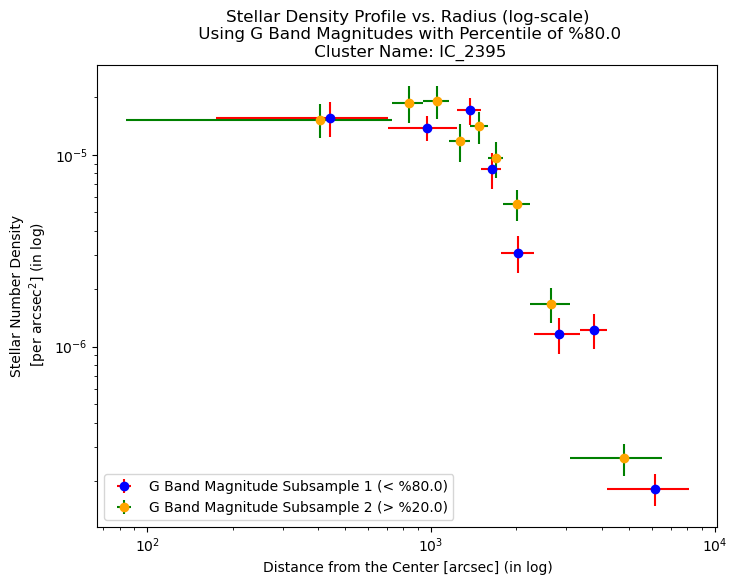

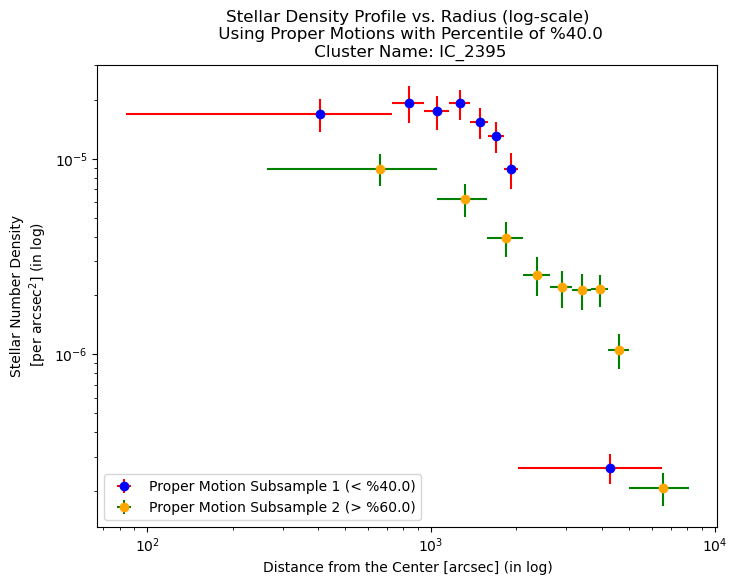

C:\Users\kayah\AppData\Local\Temp\ipykernel_12532\1509190603.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_stars["Proper Motion"] = proper_motions


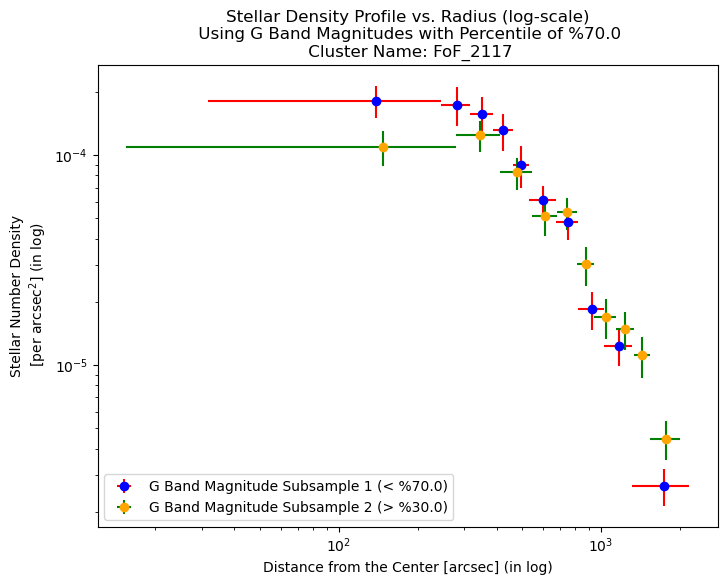

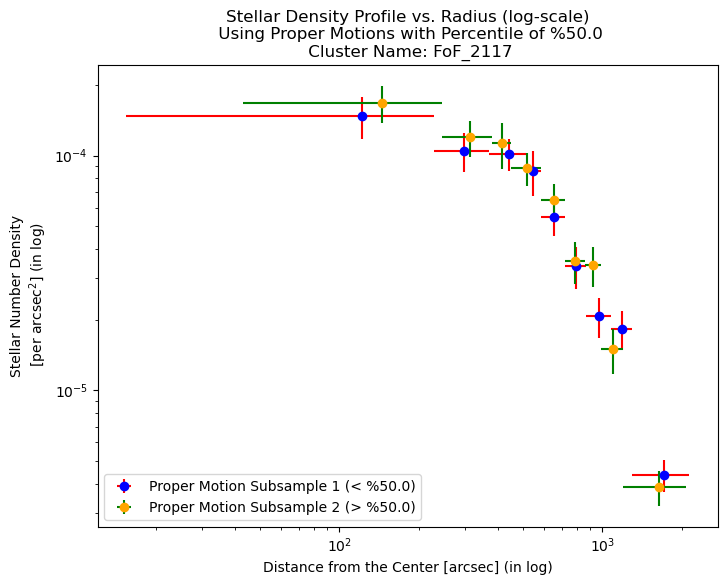

In [32]:
#Now we need to plot the Stellar Density Profiles for all the Subsamples of all
#clusters we have.
#For this, we will again define a loop.

for name in cluster_names:
    #We first get the G Band Magnitude Subsamples.
    g_band_low, g_band_high = g_band_samples(stars_df, name, 30)
    
    #We then get the Proper Motion Subsamples.
    proper_motion_low, proper_motion_high = proper_motion_samples(stars_df, name, 30)
    
    #We get the Percentile Ranges for that cluster.
    g_band_percentile_range, pm_percentile_range = percentile_ranges(stars_df, name, plot_results = False)
    
    #Now we plot the Stellar Density Profiles and also get the data we need as 
    #follows.
    plot_subsample_SDP(g_band_low, g_band_high, 
                       proper_motion_low, proper_motion_high, 
                       clusters_df, name, g_band_percentile_range,
                       pm_percentile_range, plot_results = True)

## Null Hypothesis (Beginning):
* **There is no significant difference between the Stellar Density Profiles of two subsamples!** (Both subsamples follow the same Stellar Density Profile)
* **Such that the Subsample model parameters are equal to one another.**

## Alternative Hypotheses:
* **There is a significant difference between the Stellar Density Profiles of two subsamples!** (Both Subsamples do not follow the same Stellar Density Profiles)
* **The Subsample model parameters are not equal to one another.**
* **We will get a better fit by letting some of the model parameters free.**

## Null Hypothesis between two different fits:
* Between two fits, the change in the freed parameter is **NOT** significant!
* This means that if our **p-value is lower than lets say 1-$\sigma$ which is around 0.05**:
    * **The Null Hypothesis is rejected!**
    * **The freed parameter makes the fit better!**

C:\Users\kayah\AppData\Local\Temp\ipykernel_12532\1509190603.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_stars["Proper Motion"] = proper_motions


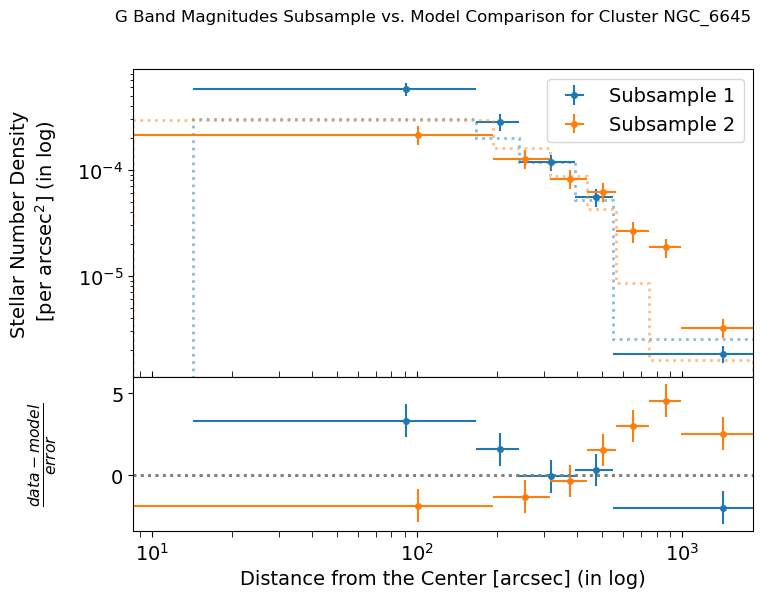

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Null Hypothesis - All Parameters are Tied/Fixed
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 85
    # data points      = 12
    # variables        = 4
    chi-square         = 61.9652511
    reduced chi-square = 7.74565639
    Akaike info crit   = 27.7000053
    Bayesian info crit = 29.6396319
[[Variables]]
    rho_0_1:  4.8407e-04 +/- 1.4399e-04 (29.75%) (init = 0.0005770176)
    r_c_1:    185.593383 +/- 142.672181 (76.87%) (init = 7.140623)
    r_t_1:    675.944318 +/- 128.268734 (18.98%) (init = 547.7196)
    c_1:      1.5947e-06 +/- 1.3578e-06 (85.14%) (init = 1e-08)
    rho_0_2:  4.8407e-04 +/- 1.4399e-04 (29.75%) == 'rho_0_1'
    r_c_2:    185.593383 +/- 142.672181 (76.87%) == 'r_c_1'
    r_t_2:    675.944318 +/- 128.268734 (18.98%) == 'r_t_1'
    c_2:      1.5947e-06 +/- 1.3578e-06 (85.14%) == 'c_1'
[[Correlations]] (unreported

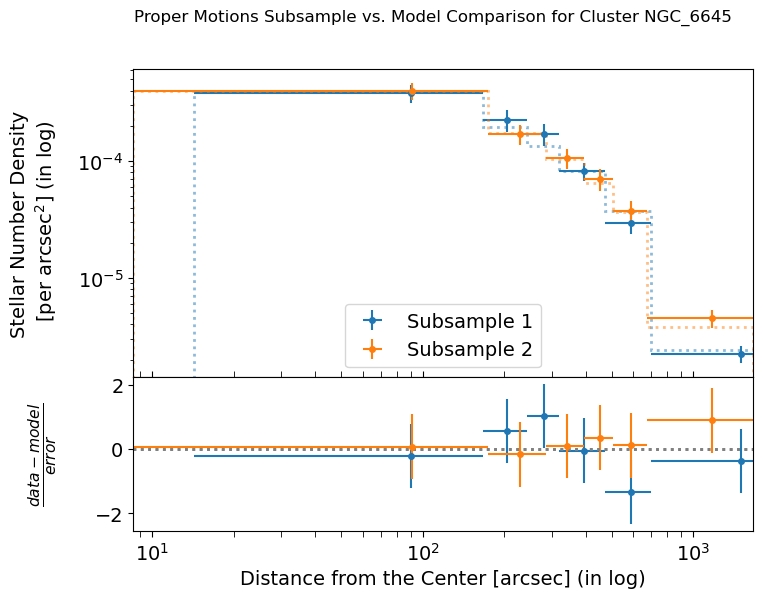

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Null Hypothesis - All Parameters are Tied/Fixed
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 99
    # data points      = 12
    # variables        = 4
    chi-square         = 4.30931108
    reduced chi-square = 0.53866389
    Akaike info crit   = -4.28954320
    Bayesian info crit = -2.34991660
[[Variables]]
    rho_0_1:  6.3385e-04 +/- 8.7784e-05 (13.85%) (init = 0.0003808316)
    r_c_1:    90.2392612 +/- 19.8330063 (21.98%) (init = 7.140623)
    r_t_1:    931.927824 +/- 91.3734080 (9.80%) (init = 700.1305)
    c_1:      1.0899e-06 +/- 8.7083e-07 (79.90%) (init = 1e-08)
    rho_0_2:  6.3385e-04 +/- 8.7784e-05 (13.85%) == 'rho_0_1'
    r_c_2:    90.2392612 +/- 19.8330063 (21.98%) == 'r_c_1'
    r_t_2:    931.927824 +/- 91.3734082 (9.80%) == 'r_t_1'
    c_2:      1.0899e-06 +/- 8.7083e-07 (79.90%) == 'c_1'
[[Correlations]] (unreported

C:\Users\kayah\AppData\Local\Temp\ipykernel_12532\1509190603.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_stars["Proper Motion"] = proper_motions


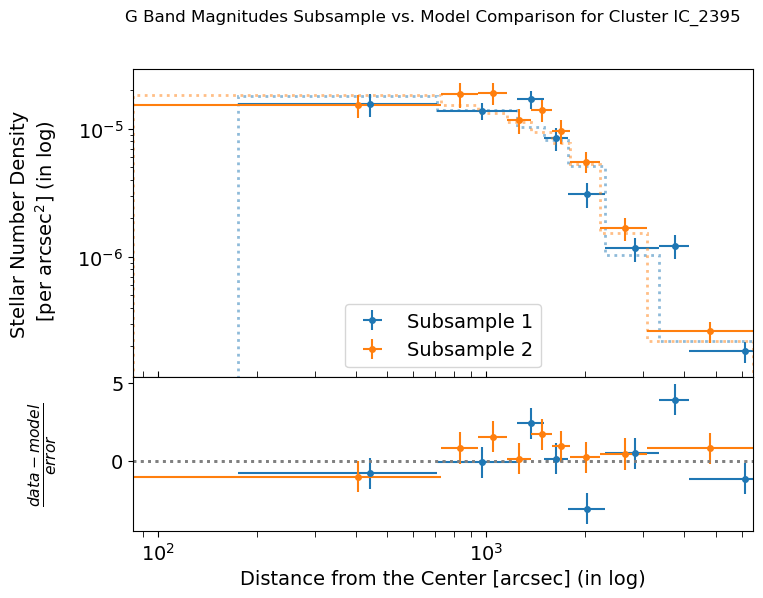

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Null Hypothesis - All Parameters are Tied/Fixed
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 76
    # data points      = 17
    # variables        = 4
    chi-square         = 41.7691669
    reduced chi-square = 3.21301284
    Akaike info crit   = 23.2820665
    Bayesian info crit = 26.6149199
[[Variables]]
    rho_0_1:  3.7028e-05 +/- 8.9812e-06 (24.25%) (init = 1.703291e-05)
    r_c_1:    1548.37183 +/- 770.292022 (49.75%) (init = 619.1916)
    r_t_1:    2880.81647 +/- 204.504687 (7.10%) (init = 4161.654)
    c_1:      2.2030e-07 +/- 5.0474e-08 (22.91%) (init = 1e-08)
    rho_0_2:  3.7028e-05 +/- 8.9812e-06 (24.25%) == 'rho_0_1'
    r_c_2:    1548.37183 +/- 770.292022 (49.75%) == 'r_c_1'
    r_t_2:    2880.81647 +/- 204.504687 (7.10%) == 'r_t_1'
    c_2:      2.2030e-07 +/- 5.0474e-08 (22.91%) == 'c_1'
[[Correlations]] (unreported c

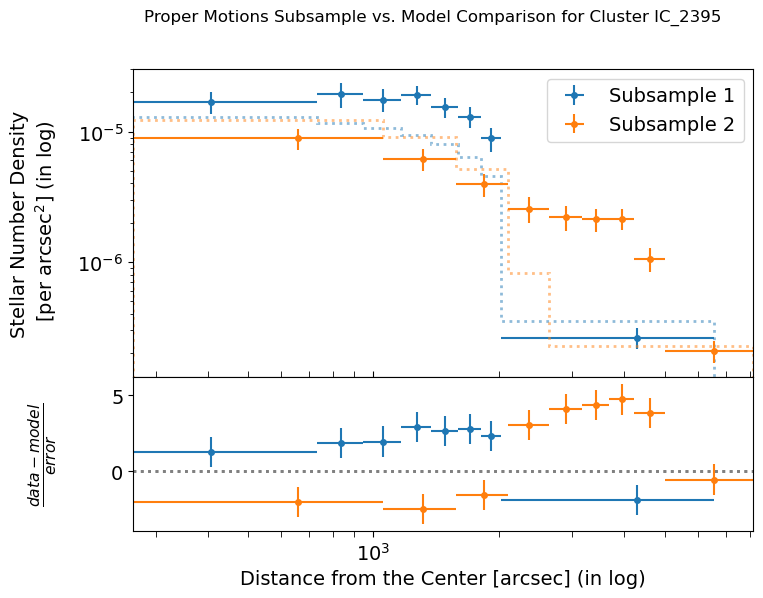

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Null Hypothesis - All Parameters are Tied/Fixed
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 136
    # data points      = 17
    # variables        = 4
    chi-square         = 136.075343
    reduced chi-square = 10.4673341
    Akaike info crit   = 43.3599214
    Bayesian info crit = 46.6927748
[[Variables]]
    rho_0_1:  0.05397847 +/- 233.697774 (432946.30%) (init = 1.939053e-05)
    r_c_1:    106338.739 +/- 2.3029e+08 (216562.97%) (init = 365.1686)
    r_t_1:    2343.88198 +/- 307.852418 (13.13%) (init = 2023.117)
    c_1:      2.2862e-07 +/- 1.1975e-07 (52.38%) (init = 1e-08)
    rho_0_2:  0.05397847 +/- 233.697774 (432946.30%) == 'rho_0_1'
    r_c_2:    106338.739 +/- 2.3029e+08 (216562.97%) == 'r_c_1'
    r_t_2:    2343.88198 +/- 307.852418 (13.13%) == 'r_t_1'
    c_2:      2.2862e-07 +/- 1.1975e-07 (52.38%) == 'c_1'
[[Correlati

C:\Users\kayah\AppData\Local\Temp\ipykernel_12532\1509190603.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_stars["Proper Motion"] = proper_motions


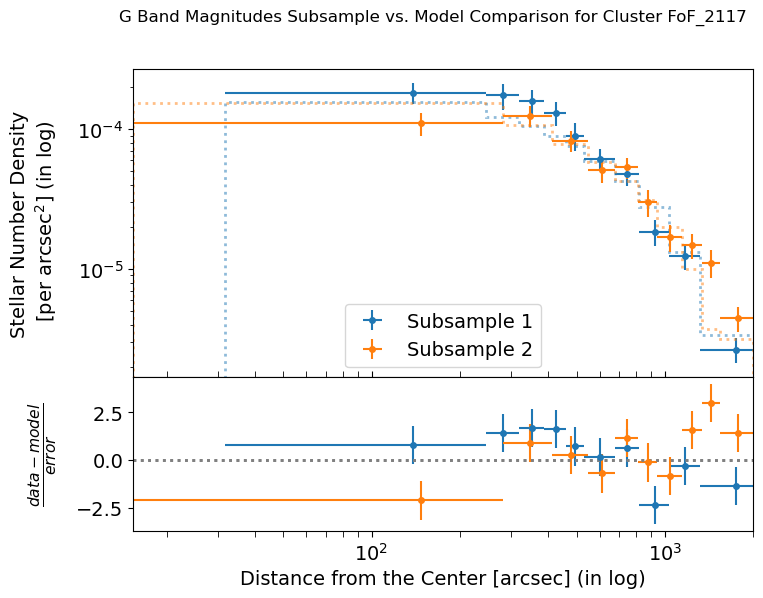

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Null Hypothesis - All Parameters are Tied/Fixed
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 161
    # data points      = 20
    # variables        = 4
    chi-square         = 37.5292583
    reduced chi-square = 2.34557864
    Akaike info crit   = 20.5877715
    Bayesian info crit = 24.5707006
[[Variables]]
    rho_0_1:  2.2316e-04 +/- 3.1831e-05 (14.26%) (init = 0.0001818967)
    r_c_1:    322.474210 +/- 100.440406 (31.15%) (init = 15.81677)
    r_t_1:    1422.49707 +/- 122.800173 (8.63%) (init = 1317.624)
    c_1:      3.1487e-06 +/- 8.4828e-07 (26.94%) (init = 1e-08)
    rho_0_2:  2.2316e-04 +/- 3.1831e-05 (14.26%) == 'rho_0_1'
    r_c_2:    322.474210 +/- 100.440406 (31.15%) == 'r_c_1'
    r_t_2:    1422.49707 +/- 122.800173 (8.63%) == 'r_t_1'
    c_2:      3.1487e-06 +/- 8.4828e-07 (26.94%) == 'c_1'
[[Correlations]] (unreported 

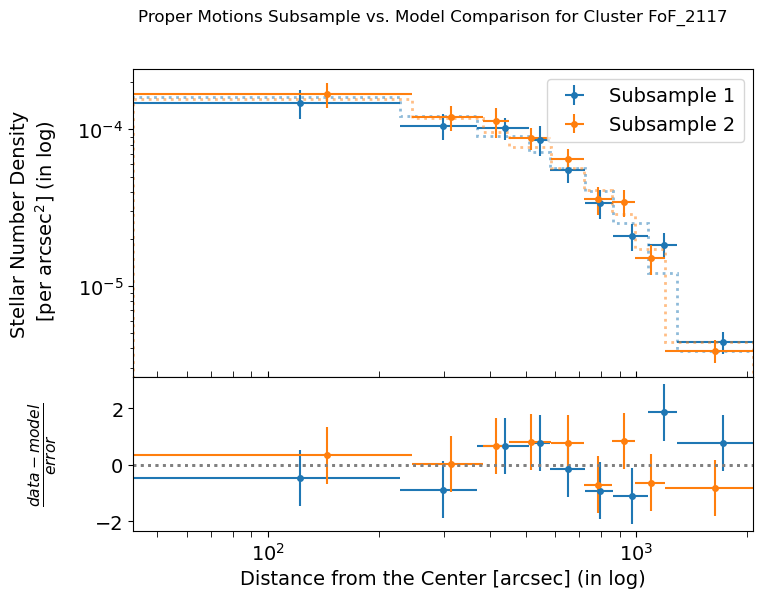

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Null Hypothesis - All Parameters are Tied/Fixed
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 85
    # data points      = 18
    # variables        = 4
    chi-square         = 12.1843820
    reduced chi-square = 0.87031300
    Akaike info crit   = 0.97609780
    Bayesian info crit = 4.53758483
[[Variables]]
    rho_0_1:  2.3119e-04 +/- 1.8433e-05 (7.97%) (init = 0.0001475689)
    r_c_1:    360.569396 +/- 75.5869432 (20.96%) (init = 7.699055)
    r_t_1:    1362.89604 +/- 84.3099031 (6.19%) (init = 1291.295)
    c_1:      3.7041e-06 +/- 6.5954e-07 (17.81%) (init = 1e-08)
    rho_0_2:  2.3119e-04 +/- 1.8433e-05 (7.97%) == 'rho_0_1'
    r_c_2:    360.569396 +/- 75.5869430 (20.96%) == 'r_c_1'
    r_t_2:    1362.89604 +/- 84.3099030 (6.19%) == 'r_t_1'
    c_2:      3.7041e-06 +/- 6.5954e-07 (17.81%) == 'c_1'
[[Correlations]] (unreported cor

In [33]:
#Now we are gonna do the fitting and Hypothesis testing as follows.
for name in cluster_names:
    #We first get the G Band Magnitude Subsamples.
    g_band_low, g_band_high = g_band_samples(stars_df, name, 30)
    
    #We then get the Proper Motion Subsamples.
    proper_motion_low, proper_motion_high = proper_motion_samples(stars_df, name, 30)
    
    #We get the Percentile Ranges for that cluster.
    g_band_percentile_range, pm_percentile_range = percentile_ranges(stars_df, name, plot_results = False)
    
    #We get the bin edges, star densities and their errors for subsamples of
    #G Band Magnitudes and Proper Motions as follows.
    (bin_edges_gband, bin_edges_pm, star_densities_gband, 
     star_densities_pm, xerr_gband, xerr_pm, yerr_gband, 
     yerr_pm) = plot_subsample_SDP(g_band_low, g_band_high, proper_motion_low, 
                                   proper_motion_high, clusters_df, name, 
                                   g_band_percentile_range, pm_percentile_range, 
                                   get_results = True)
    
    #We have to do the fitting for G-Band Magnitudes and Proper Motions.
    #For that we define a small loop.
    for i in range(0,2):
        if i == 0:
            xdata = bin_edges_gband
            ydata = star_densities_gband
            xerror = xerr_gband
            yerror = yerr_gband
            quantity_name = "G Band Magnitudes"
            
        
        if i == 1:
            xdata = bin_edges_pm
            ydata = star_densities_pm
            xerror = xerr_pm
            yerror = yerr_pm
            quantity_name = "Proper Motions"
        
        #We add our parameters to our Parameters_Fit as follows.
        #Since the Radius values can not be a negative value we set the minimum
        #value for them to be zero.
            #rho_0:  Normalization Factor (we can estimate)
            #r_c: Core Radius of the Cluster (we can estimate)
            #r_t: Tidal Radius (where the cluster is truncated) (we can estimate)
            #c: Constant which corresponds to the Number Density of unassociated 
            #foreground/background stars. (we won't estimate exactly)
        
        #NOTE: We will only use the first subsample to get the initial values
        #since the initial values for both subsamples can be more or less the
        #same for this situation.
        
        #Critical Density/Normalization Factor is basically the peak of the profile.
        rho_0_initial = max(ydata[0])

        #Core Radius can be estimated with the Radius of the Maximum Density divided
        #by 2 as follows.
        max_density_index = np.unravel_index(np.argmax(ydata[0], axis=None), ydata[0].shape)
        r_c_initial = xdata[0][max_density_index] / 2

        #Tidal Radius can be estimated by checking where the decrease on the stellar 
        #density is a lot, so we can say that that's where the cluster is truncated.
        #We create a threshold for decrease.
        threshold_density = 0.03
        truncation_index = np.where(ydata[0] < threshold_density * np.max(ydata[0]))[0]
        r_t_initial = xdata[0][truncation_index][0]
    
        ############################## NULL HYPOTHESIS ############################
    
        #We define our Parameters object.
        parameters = Parameters()

        #We add the parameters inside our Parameters object.
        #Note that we need to specify all the properties to get to the tie up part.
        #We will first vary all the parameters.
        #Then we will first tie up the rho_0, then r_c, then r_t!
        parameters.add_many(("rho_0_1", rho_0_initial, True, 0), ("r_c_1", r_c_initial, True, 0), 
                            ("r_t_1", r_t_initial, True, 0), ("c_1", 1e-8, True, 0),
                            ("rho_0_2", rho_0_initial, True, None, None, "rho_0_1"), ("r_c_2", r_c_initial, True, None, None, "r_c_1"), 
                            ("r_t_2", r_t_initial, True, None, None, "r_t_1"), ("c_2", 1e-8, True, None, None, "c_1"))

        #Now we define our model.
        model = King_Profile_Multiple

        #We define our output residual.
        output_residual = True

        #We define our fit function.
        fit_function = Minimizer(lmfit_least_squares_multiple, parameters, 
                                 fcn_args = (xdata, ydata, yerror, model, output_residual),
                                 nan_policy = "omit")

        #We get our result (Null Hypothesis).
        result_null = fit_function.minimize(method = "leastsq")
        
        #To calculate the best-fitting model values, use the parameters of the best fit
        #output from the fit, result.params and set output_resid = false to output a 
        #list of model y-values as follows.
        model_values = lmfit_least_squares_multiple(result_null.params, xdata, ydata, yerror, model, output_residual = False)

        #Now we plot the data and model and residuals.
        #We get the Legend Labels.
        legend_labels = ["Subsample 1", "Subsample 2"]

        #Now we plot our results.
        plot_model_multiple(xdata, ydata, yerror, model_values, "weighted residual", 
                            legend_labels, quantity_name, name)
        
        #We report our fit.
        print(60 * "~")
        print("Null Hypothesis - All Parameters are Tied/Fixed")
        print(60 * "~")
        report_fit(result_null)

        #We also report our Minimum Chi-Squared value for our Degrees of Freedom.
        print(60 * "~")
        print("Minimum Chi-squared = "
              + str(result_null.chisqr)
              + " for "
              + str(result_null.nfree) 
              + " d.o.f.")
        print(60 * "~")

        #We report the goodness of fit as well.
        print("The goodness of fit is: ", sps.chi2.sf(result_null.chisqr, df = result_null.nfree))
        print(60 * "~")
        
        print(60 * " ")
        print(30 * "*-")
        print(60 * " ")

        ########################## ALTERNATIVE HYPOTHESIS 1 #########################
        
        #We free the Tidal Radius (r_t) first.
        parameters.add_many(("rho_0_1", rho_0_initial, True, 0), ("r_c_1", r_c_initial, True, 0), 
                            ("r_t_1", r_t_initial, True, 0), ("c_1", 1e-8, True, 0),
                            ("rho_0_2", rho_0_initial, True, None, None, "rho_0_1"), ("r_c_2", r_c_initial, True, None, None, "r_c_1"), 
                            ("r_t_2", r_t_initial, True, 0), ("c_2", 1e-8, True, None, None, "c_1"))
        
        fit_function = Minimizer(lmfit_least_squares_multiple, parameters,
                                 fcn_args = (xdata, ydata, yerror, model, output_residual),
                                 nan_policy = "omit")

        result_alternative1 = fit_function.minimize(method = "leastsq")
        print(60 * "~")
        print("Alternative Hypothesis 1 - Tidal Radius Freed")
        print(60 * "~")
        report_fit(result_alternative1)

        #We also report our Minimum Chi-Squared value for our Degrees of Freedom.
        print(60 * "~")
        print("Minimum Chi-squared = "
              + str(result_alternative1.chisqr)
              + " for "
              + str(result_alternative1.nfree) 
              + " d.o.f.")
        print(60 * "~")

        #We report the goodness of fit as well.
        print("The goodness of fit is: ", sps.chi2.sf(result_alternative1.chisqr, df = result_alternative1.nfree))
        print(60 * "~")
        
        #Note that our new fit is the new Null, since it has the most constraints!
        #We get our number of constraints as follows.
        no_of_constraints = result_null.nfree - result_alternative1.nfree

        #We get the Delta Chi Squared i.e. the improvement on the fit as follows.
        delta_chi_squared = result_null.chisqr - result_alternative1.chisqr

        #Now we print the result for our Null and Alternative Hypothesis Fits.
        print("p-value for our Delta-Chi Squared:", 
              sps.chi2.sf(delta_chi_squared, df = no_of_constraints),
              "for", no_of_constraints, "fewer constraints.")
        print(60 * "~")
        
        #We also print our comments about the results.
        print(60 * "-")
        print("COMMENTS")
        print(60 * "-")
        if (sps.chi2.sf(result_null.chisqr, df = result_null.nfree) - sps.chi2.sf(result_alternative1.chisqr, df = result_alternative1.nfree) < 0):
            print("The goodness of fit has improved.")
        
        else:
            print("The goodness of fit has not improved.")
        
        if sps.chi2.sf(delta_chi_squared, df = no_of_constraints) < 0.05:
            print("The p-value shows that the improvement is significant on 1-𝜎 significance level.")
            print("This means that freeing the Tidal Radius has resulted in getting a significantly better fit!")
            print("This also means that the Tidal Radius for two subsamples are different.")
        
        else:
            print("The p-value shows that the improvement is not significant on 1-𝜎 significance level.")
            print("This means that freeing the Tidal Radius has not resulted in getting a significantly better fit.")
            print("This also means that the Tidal Radius for two subsamples are same.")
        
        print(60 * "~")
        print(60 * " ")
        print(30 * "*-")
        print(60 * " ")
        
        ########################## ALTERNATIVE HYPOTHESIS 2 #########################
        
        #We free the Core Radius (r_c) next.
        parameters.add_many(("rho_0_1", rho_0_initial, True, 0), ("r_c_1", r_c_initial, True, 0), 
                            ("r_t_1", r_t_initial, True, 0), ("c_1", 1e-8, True, 0),
                            ("rho_0_2", rho_0_initial, True, None, None, "rho_0_1"), ("r_c_2", r_c_initial, True, 0), 
                            ("r_t_2", r_t_initial, True, 0), ("c_2", 1e-8, True, None, None, "c_1"))
        
        fit_function = Minimizer(lmfit_least_squares_multiple, parameters,
                                 fcn_args = (xdata, ydata, yerror, model, output_residual),
                                 nan_policy = "omit")

        result_alternative2 = fit_function.minimize(method = "leastsq")
        print(60 * "~")
        print("Alternative Hypothesis 2 - Tidal Radius & Core Radius Freed")
        print(60 * "~")
        report_fit(result_alternative2)

        #We also report our Minimum Chi-Squared value for our Degrees of Freedom.
        print(60 * "~")
        print("Minimum Chi-squared = "
              + str(result_alternative2.chisqr)
              + " for "
              + str(result_alternative2.nfree) 
              + " d.o.f.")
        print(60 * "~")

        #We report the goodness of fit as well.
        print("The goodness of fit is: ", sps.chi2.sf(result_alternative2.chisqr, df = result_alternative2.nfree))
        print(60 * "~")
        
        #Note that our new fit is the new Null, since it has the most constraints!
        #We get our number of constraints as follows.
        no_of_constraints = result_alternative1.nfree - result_alternative2.nfree

        #We get the Delta Chi Squared i.e. the improvement on the fit as follows.
        delta_chi_squared = result_alternative1.chisqr - result_alternative2.chisqr

        #Now we print the result for our Null and Alternative Hypothesis Fits.
        print("p-value for our Delta-Chi Squared:", 
              sps.chi2.sf(delta_chi_squared, df = no_of_constraints),
              "for", no_of_constraints, "fewer constraints.")
        print(60 * "~")
        
        #We also print our comments about the results.
        print(60 * "-")
        print("COMMENTS")
        print(60 * "-")
        if (sps.chi2.sf(result_alternative1.chisqr, df = result_alternative1.nfree) - sps.chi2.sf(result_alternative2.chisqr, df = result_alternative2.nfree) < 0):
            print("The goodness of fit has improved.")
        
        else:
            print("The goodness of fit has not improved.")
        
        if sps.chi2.sf(delta_chi_squared, df = no_of_constraints) < 0.05:
            print("The p-value shows that the improvement is significant on 1-𝜎 significance level.")
            print("This means that freeing the Core Radius has resulted in getting a significantly better fit!")
            print("This also means that the Core Radius for two subsamples are different.")
        
        else:
            print("The p-value shows that the improvement is not significant on 1-𝜎 significance level.")
            print("This means that freeing the Core Radius has not resulted in getting a significantly better fit.")
            print("This also means that the Core Radius for two subsamples are same.")
        
        print(60 * "~")
        print(60 * " ")
        print(30 * "*-")
        print(60 * " ")
        
        ########################## ALTERNATIVE HYPOTHESIS 3 #########################
        
        #We free the Normalization Factor (rho_0) next.
        parameters.add_many(("rho_0_1", rho_0_initial, True, 0), ("r_c_1", r_c_initial, True, 0), 
                            ("r_t_1", r_t_initial, True, 0), ("c_1", 1e-8, True, 0),
                            ("rho_0_2", rho_0_initial, True, 0), ("r_c_2", r_c_initial, True, 0), 
                            ("r_t_2", r_t_initial, True, 0), ("c_2", 1e-8, True, None, None, "c_1"))
        
        fit_function = Minimizer(lmfit_least_squares_multiple, parameters,
                                 fcn_args = (xdata, ydata, yerror, model, output_residual),
                                 nan_policy = "omit")

        result_alternative3 = fit_function.minimize(method = "leastsq")
        print(60 * "~")
        print("Alternative Hypothesis 3 - Tidal Radius, Core Radius and Normalization Factor Freed")
        print(60 * "~")
        report_fit(result_alternative3)

        #We also report our Minimum Chi-Squared value for our Degrees of Freedom.
        print(60 * "~")
        print("Minimum Chi-squared = "
              + str(result_alternative3.chisqr)
              + " for "
              + str(result_alternative3.nfree) 
              + " d.o.f.")
        print(60 * "~")

        #We report the goodness of fit as well.
        print("The goodness of fit is: ", sps.chi2.sf(result_alternative3.chisqr, df = result_alternative3.nfree))
        print(60 * "~")
        
        #Note that our new fit is the new Null, since it has the most constraints!
        #We get our number of constraints as follows.
        no_of_constraints = result_alternative2.nfree - result_alternative3.nfree

        #We get the Delta Chi Squared i.e. the improvement on the fit as follows.
        delta_chi_squared = result_alternative2.chisqr - result_alternative3.chisqr

        #Now we print the result for our Null and Alternative Hypothesis Fits.
        print("p-value for our Delta-Chi Squared:", 
              sps.chi2.sf(delta_chi_squared, df = no_of_constraints),
              "for", no_of_constraints, "fewer constraints.")
        print(60 * "~")
        
        #We also print our comments about the results.
        print(60 * "-")
        print("COMMENTS")
        print(60 * "-")
        if (sps.chi2.sf(result_alternative2.chisqr, df = result_alternative2.nfree) - sps.chi2.sf(result_alternative3.chisqr, df = result_alternative3.nfree) < 0):
            print("The goodness of fit has improved.")
        
        else:
            print("The goodness of fit has not improved.")
        
        if sps.chi2.sf(delta_chi_squared, df = no_of_constraints) < 0.05:
            print("The p-value shows that the improvement is significant on 1-𝜎 significance level.")
            print("We reject the previous 'Null' Hypothesis, accept this Alternative Hypothesis.")
            print("This means that freeing the Normalization Factor has resulted in getting a significantly better fit!")
            print("This also means that the Normalization Factor for two subsamples are different.")
        
        else:
            print("The p-value shows that the improvement is not significant on 1-𝜎 significance level.")
            print("We accept the previous (Alternative) 'Null' Hypothesis.")
            print("This means that freeing the Normalization Factor has not resulted in getting a significantly better fit.")
            print("This also means that the Normalization Factor for two subsamples are same.")
        
        print(60 * " ")
        print(30 * "*-")
        print(60 * " ")

## Comments:

* The comments are given with the printed results.
* **The Comments were made with the following algorithm:**
    * 1-) **If the goodness of fit has decreased: The fit has not been improved by freeing the current parameter we are investigating.**
    * 2-) **If the goodness of fit has increased: The fit has been improved by freeing the current parameter we are investigating.**
    * 3-) **If the p-value is lower than 0.05: The fit improvement is significant on 1-$\sigma$ significance level and the freed parameter is different for both subsamples.**
    * 4-) **If the p-value is higher than 0.05: The fit improvement is not significant on 1-$\sigma$ significance level and the freed parameter is the same for both subsamples.**

* Let's talk about how we interpreted our results in general:
    * 1-) **If p-value is really high ( > 0.05 so 1-$\sigma$) that means that there is no significant improvement from one fit to another.**
    * 2-) **We should (usually) favour the simpler model i.e. fewer free parameters!**
    * 3-) **Improvements in the goodness of fit can happen not just because of the smaller chi-squared but also because we reduce the freedom of our model to fit the data!**

# Task 4:

* Making some plausible assumptions about the Mass Distribution in the cluster, we can use the virial theorem ($2K + U = 0$) to estimate the Mass $M$ of the cluster as follows:

$$M=\frac{3 r_c\left\langle\sigma_{\mathrm{pm}}^2\right\rangle}{2 G}$$

* **In here:**
    * $G$: Gravitational Constant
    * $r_c$: Cluster Core Radius
    * $\left\langle\sigma_{\mathrm{pm}}^2\right\rangle$: Population Mean of the Squared-Velocity dispersion of the cluster stars. (Which can be measured from the sample variance of the cluster stars Proper Motions)
        * $\sigma_{p m}^2=\sigma_{p m, R A}^2+\sigma_{p m, D E}^2$

* To calculate the Mass: **These need to be turned into the correct physical units, using the distance to the cluster d.**

* Use Bayes' Theorem to write out the equation relating the **Posterior Distribution of mass $M$** to the **Likelihood of the data given the parameters $M$, $d$, $\left\langle\sigma_{\mathrm{pm}}^2\right\rangle$, $\rho_0$ and $r_t$**.

* Then, use MCMC to fit the complete Dataset for one of your clusters (your choice) with **appropriate priors on these parameters**.
* **Use the results to obtain the MLE and 1-$\sigma$ confidence interval on the Mass.**
* Be sure to calculate Mass in physical units (kg, g or solar masses are all fine).
* Be careful to explain your reasoning and state your assumptions clearly!

## Assumptions:
* 1-) Since Data/Star count is high, we may consider our errors to be normally distributed (if it weren't, they would be poisson distributed).
* 2-) Due to the bins having a lot of star/data counts, according to Central Limit Theorem (CLT) we may assume that the histogram distribution to be normally distributed.
* 3-) For MLE we need the assumption that the data is **i.i.d (Independent and Identically Distributed)!**
* 4-) This means that the observation data we have are independent from one another and also drawn from the same distribution!
* 5-) Chi-Squared Statistic will be used for the calculations instead of Poisson.
* 6-) We assume that the Mass and Velocity-Dispersions are both Normally Distributed, so the samples we get for those two quantities are from the Normal Distribution. (Needed for the Prior)

## The Cluster we will use: FoF 2117

* I chose this cluster because it had the best Goodness of Fit out of all of my clusters (0.210).
* **We will use the parameter values we have obtained from the King Fit we have done in Task 2:**
    * **Normalization Factor**: $\rho_0 = 7.511 * 10^{-4}$
    * **Core Radius**: $r_c = 273.420$ $arcsec$
    * **Tidal Radius**: $r_t = 1688.837$ $arcsec$
    * **Constant**: $c = 5.574 * 10^{-6}$

In [34]:
#We first import the libraries we need for the MCMC as follows.
import emcee
import corner

Summed Log-Likelihoods: [ 1.12105324e+00  1.10664522e-01  1.40864488e-01 -1.04496319e+00
 -1.22660351e+00 -2.86828498e-01 -1.40526915e+00 -1.63998059e+00
 -8.86180219e-01 -3.36544446e-01  7.43230418e-01  7.58270044e-01
  1.96511647e+00  1.33969278e+00  1.57295733e+00 -6.60242408e-01
  5.92393087e-01  5.57121362e-02 -9.16286706e-01 -9.76447803e-01
 -5.41371298e-09]


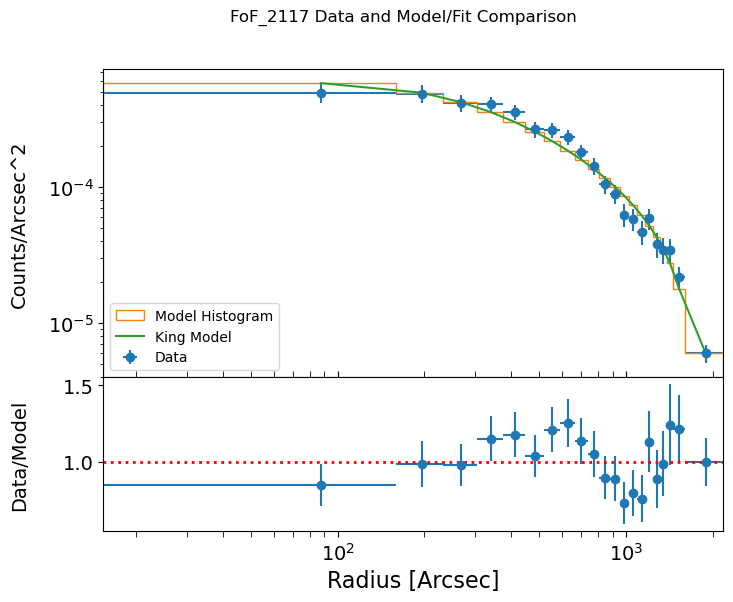

In [35]:
#We start by doing a fit using King's Model in order to get the values we have
#described above.
name = "FoF_2117"

model = King_Profile

#We get the histogram for our Cluster.
counts, edges = star_num_density_hist(clusters_df, stars_df, name)

#We rebin the histogram for our Cluster.
star_counts, bin_edges = histogram_rebin(20, counts, edges)

#We get the star densities and radii values.
star_densities, radii, yerr, xerr = stellar_density_profile(clusters_df, 
                                    stars_df, name, include_errors = True)

#We define the results we get from the function as our datasets as follows.
xdata = [bin_edges]
ydata = [star_densities]
yerror = [yerr]

#We first define the Parameters.
Parameters_Fit = Parameters()

#Critical Density/Normalization Factor is basically the peak of the profile.
rho_0_initial = max(ydata[0])
    
#Core Radius can be estimated with the Radius of the Maximum Density divided
#by 2 as follows.
max_density_index = np.unravel_index(np.argmax(ydata[0], axis=None), ydata[0].shape)
r_c_initial = xdata[0][max_density_index] / 2
    
#Tidal Radius can be estimated by checking where the decrease on the stellar 
#density is a lot, so we can say that that's where the cluster is truncated.
#We create a threshold for decrease.
threshold_density = 0.02
truncation_index = np.where(ydata[0] < threshold_density * np.max(ydata[0]))[0]
r_t_initial = xdata[0][truncation_index][0]

Parameters_Fit.add_many(("rho_0", rho_0_initial, True, 0),
                        ("r_c", r_c_initial, True, 0),
                        ("r_t", r_t_initial, True, 0),
                        ("c", 1e-8, True, 0))

#We now define our fit function as follows.
fit_function = Minimizer(lmfit_least_squares, Parameters_Fit, 
               fcn_args = (xdata, ydata, yerror, model, output_residual),
               nan_policy = "omit", calc_covar = True)

#We get our results from the fit as follows.
result = fit_function.minimize(method = "leastsq")

#We print the Summed Log-Likelihood.
print("Summed Log-Likelihoods:", -1 * result.residual)

#To calculate the best-fitting model values, use the parameters of the best
#fit output from the fit i.e. result.params.
#Then set output_residual = False to output a list of model y-values.
model_values = lmfit_least_squares(result.params, xdata, ydata, yerror, model, output_residual = False)

#Now we plot the Data and Model and Residuals.
#Model_values contains a list of model y-value arrays.
#For that we should identify its index.
plot_data_model(bin_edges, star_densities, yerr, model_values[0], name)

* We will need the distance to our cluster for our following calculations.
* For that we will use the code I wrote for the previous assignment!
* It gives out the value of `Distance to Cluster FoF 2117: 1.4770019415524707 kpc.` 
* The code I used will be provided in the extras part of this assignment to avoid confusion.

In [36]:
#Distance to our cluster in kiloparsecs.
cl_distance = 1.4770019415524707

In [37]:
#Now we have to define a list to store these parameter values as follows.
best_parameter_list = []

#Now we check all the parameters.
#We have rho_0 and r_t.
#Now we need mass, distance and velocity dispersion (sigma_pm).

############################## DISTANCE CONVERSION ############################

#We first start with distance.
#We need to convert it to meters from kiloparsecs.
#For this we do the following.
distance = cl_distance * 3.08567758e19

############################ CORE RADIUS CONVERSION ###########################

#We also need to convert arcsec into meters as well.
#Note that to do this, we first need to convert it into degrees, then
#radians, then multiply that with the distance to get it in meters.
#Note that we also use the best fit value for the Core Radius.
r_c = np.deg2rad(result.params["r_c"].value/3600) * distance

########################### TIDAL RADIUS CONVERSION ###########################

#We also need to convert arcsec into meters as well.
#Note that to do this, we first need to convert it into degrees, then
#radians, then multiply that with the distance to get it in meters.
#Note that we also use the best fit value for the Tidal Radius.
r_t = np.deg2rad(result.params["r_t"].value/3600) * distance

##################### VELOCITY CALCULATION & CONVERSION #######################

#Then, we calculate the Mean of the Squared-Velocity dispersion as follows.
stars_df_new = stars_df[stars_df["Name"] == name]
cluster_mean = stars_df_new.groupby(["Name"]).mean(numeric_only = True).reset_index()
cl_pm_RA_mean = cluster_mean["pmRA"]
cl_pm_Dec_mean = cluster_mean["pmDE"]
sigma_pm = np.sqrt((cl_pm_RA_mean**2) + (cl_pm_Dec_mean**2))

#Since this is in mas/year units we have to convert it to meters per second.
#Note that to do this, we first need to divide it with 1000 to get units of
#arcseconds, then convert it into degrees, then radians, then multiply that 
#with the distance to get it in meters.
sigma_pm = np.deg2rad((sigma_pm/1000)/3600) * distance
    
#Since we want the squared version of this, we take the square.
#This means that the unit of this will be [m^2/sec^2].
sigma_pm = sigma_pm ** 2

###################### MASS CALCULATION (VIRIAL THEOREM) ######################

#First we define the Gravitational constant.
#Note that it should be in units of meters, grams and seconds for it to
#match the other parameter units.
G = 6.67430e-11 #m^3/kg * sec^2
    
#Now we write the Virial Theorem equation to find the mass.
#Note that the mass we get will be in units of kilogram.
mass = 3 * r_c * sigma_pm[0] / G

###############################################################################

#Now we have converted everything we need. (Rho_0 is unitless)
rho_0 = result.params["rho_0"].value

#Note that we won't include c in our calculations.
#We add everything into our defined list.
best_parameter_list.append(mass)
best_parameter_list.append(distance)
best_parameter_list.append(sigma_pm[0])
best_parameter_list.append(rho_0)
best_parameter_list.append(r_t)

#Now we turn this list into a numpy array since our calculations use arrays.
best_parameters = np.array(best_parameter_list)

#Now we define the number of dimensions (for plotting) and number of walkers
#(for the MCMC)
num_dim, num_walkers = 5, 100

#We also turn output_residual to True again.
output_residual = True

#Now we calculate the positions of walkers.
#Basically we spread the walkers around the MLEs with a standard deviation equal
#to 1% of the MLE value as follows.
position = [best_parameters + 0.01 * best_parameters * sps.norm.rvs(size = num_dim) for i in range(num_walkers)]

In [38]:
#We also define the bin model function again, just for completion.
def bin_model_mcmc(xbins, model, parameters):
    """General function for integrating the input Model over bins defined by
    continous (no gaps) bin edges i.e. xbins
    
    Input:
    ----------------------------------------------------------------------------
    xbins: x axis bin edges.
    model: The model name.
    parameters: The associated Parameters object.
    
    Output:
    ----------------------------------------------------------------------------
    y_model: Calculated Counts-Density Model values for y-axis.
    
    """
    
    #We define a count.
    i = 0
    
    #We define the Count-Density Model values as an array.
    y_model = np.zeros(len(xbins)-1)
    
    #We now do a loop to integrate over bins and dividing the result with bin
    #width.
    for i, xval in enumerate(xbins[ : -1]):
        #We do the integration over the bin.
            #lambda is basically a "small function"
            #In here "x" is our radius i.e. Independent Variable!
        y_model[i], y_model_err = spint.quad(lambda x: 2 * np.pi * x * model(x, parameters), xbins[i], xbins[i+1])
        
        #We divide it with the bin area as follows.
        bin_area = np.pi * ((xbins[1 : ]**2) - (xbins[ : -1]**2))
        y_model[i] = y_model[i] / (bin_area[i])
    
    return y_model

In [39]:
#Now we define a new function, similar to our previous lmfit_least_squares one
#but this will have two inputs for model.
def lmfit_least_squares_mcmc(parameters, xdata, ydata, yerror, model, prior_model, output_residual = True):
    """lmfit objective function to calculate and return the Residual Array or
    Model y-values for Binned Data, where the xdata are the input bin edges and
    ydata are the densities (i.e. integral over bin divided by bin width).
    
    Input:
    ----------------------------------------------------------------------------
    parameters: Name of lmfit Parameters object set up for the fit.
    xdata: Bin Edges. (Not Bin Centers!) => To be fitted
    ydata: Count Densities. (Integral over bin / bin width) => To be fitted
    yerror: Errors on Count Densities. => To be fitted
    model: The name of the Model Funtion to be used. (Must take parameters as 
    its input parameters and return the model y-value array for a given x-value
    array!)
    prior_model: Prior Model.
    output_residual: Boolean set to True if the lmfit objective function
    (residuals) is required output, otherwise a list of model y-value arrays
    (corresponding to the input x-data list) is returned.
    
    Output:
    ----------------------------------------------------------------------------
    residual:
        If output_residual == True: The function Returns a residual array of
    (y_i - y_model(x_i))/y_err_i which is concatenated into a single array
    for all input data errors. (i.e. length is n1 + n2 in the example below.)
    
    y_model:
        If output_residual == False: Returns a list of y-model arrays. (one per
    input x-array.)
    
    Example:
    ----------------------------------------------------------------------------
    For 2 datasets to be fitted simultaneously:
        xdata = [x1, x2]
        ydata = [y1, y2]
        yerrs = [err1, err2]
    
    In here x1, y1, err1 and x2, y2, err2 are the "data" sets of 1-D arrays of
    length n1 and n2 respectively. 
        Length is n1+1 for x1 since it is binedges!
        Length is n2+2 for x2 since it is binedges!
    
    Note: A single Data Set should also be given via a list, i.e. xdata = [x1],
    ydata = [y1], yerr = [err1].
    
    """
    
    if output_residual == True:
        first_residual = 0
        #We loop through each input dataset (lists) and record residual array.
        for i, xvals in enumerate(xdata):
            if i == 0:
                residual = (ydata[i] - bin_model_mcmc(xdata[i], model, parameters)) / yerror[i]
            
            else:
                residual = np.append(residual, (ydata[i] - bin_model(xdata[i], model, parameters)) / yerror[i])
        
        residual_prior = residual + prior_model(parameters)
        
        if not np.isfinite(residual_prior):
            return -np.inf
        
        else:
            return np.sum(residual**2) #This is the chi squared statistic!
    
    else:
        y_model = []
        #We record a list of model y-value arrays, one per input Dataset.
        for i, xvals in enumerate(xdata):
            y_model.append(bin_model_mcmc(xdata[i], model, parameters))
        
        return y_model

In [40]:
#Now we define a new Kings Model for the MCMC.
#For this purpose, we will remove c from our calculations since it won't make
#much difference, it is close to zero.
def King_Empirical(radius, parameters):
    """Takes the parameters and returns the appropriate equation depending on
    the conditions that is defined for King Model.
    
    Input:
    ----------------------------------------------------------------------------
    radius: The radius of the cluster "circle" we are in.
    parameters: Parameters list containing all the parameters needed to find
    the King's Model. (In order: mass, distance, mean velocity-dispersion, 
    normalization factor, tidal radius.)
    
    Output:
    ----------------------------------------------------------------------------
    rho_king: Stellar Density Model at given Radius of the cluster.
    
    """
    
    #We get the parameters as follows.
    p = parameters.valuesdict()
    
    #We calculate r_c from the values we have, using the Virial theorem.
    r_c = 2 * G * p["mass"] / (3 * p["sigma_pm"])
    
    rho_king = (p["rho_0"] * ((1/np.sqrt(1 + (radius/r_c)**2)) - (1/np.sqrt(1 + (p["r_t"]/r_c)**2))))
    
    return rho_king

* Let's remember the Bayes' Theorem briefly.

$$P(H\vert D) = \frac{P(D\vert H)P(H)}{P(D)}$$

* $P(H\vert D)$: **Posterior Probability/The Posterior**
    * The term we want to know.
    * Gives the Posterior Probability of the parameter $H$ given the data $D$.
* $P(D\vert H)$: **Likelihood**
    * It is the likelihood of obtaining the data, given our hypothesis.
* $P(H)$: **Prior Probability/The Prior**
    * Our Prior Knowledge or Belief about whether the given hypothesis is likely or not.
    * It represents what we consider plausible parameter values.
* $P(D)$: **Evidence**
    * A normalization constant.
    * A term corresponding to the probability of obtaining the given data, regardless of obtaining the given data.
    * **This term can be calculated by marginalising over the possible parameter values and whatever viable, alternate hypotheses can account for the data.**

In [41]:
#We'll first define our Likelihood of the data as a function given the 
#parameters: 
    #Mass (M)
    #Distance (d)
    #Population Mean of the Squared-Velocity dispersion of the cluster stars 
#(<𝜎^2>)
    #Normalization Factor (rho_0)
    #Tidal Radius (r_t)

#We define our Likelihood function as follows.
def log_likelihood(parameters, star_df):
    """Takes the parameters and star DataFrame, returns the logarithm of the
    likelihood calculated by the Chi-Squared Statistic.
    
    Input:
    ----------------------------------------------------------------------------
    parameters: Parameters list containing all the parameters needed to find
    the King's Model. (In order: mass, distance, mean velocity-dispersion, 
    normalization factor, tidal radius.)
    star_df: DataFrame containing the stars in our Cluster.
    
    Output:
    ----------------------------------------------------------------------------
    log_likelihood: Log Likelihood value calculated by Chi-Squared Statistic.
    
    """
    
    #We take all of the parameters as follows.
    (mass, distance, sigma_pm, rho_0, r_t) = parameters
    
    #We start by doing a fit using King's Model in order to get the values we have
    #described above.
    name = "FoF_2117"

    model = King_Empirical

    #We get the histogram for our Cluster.
    counts, edges = star_num_density_hist(clusters_df, stars_df, name)

    #We rebin the histogram for our Cluster.
    star_counts, bin_edges = histogram_rebin(20, counts, edges)

    #We get the star densities and radii values.
    star_densities, radii, yerr, xerr = stellar_density_profile(clusters_df, 
                                        stars_df, name, include_errors = True)

    #We define the results we get from the function as our datasets as follows.
    xdata = [bin_edges]
    ydata = [star_densities]
    yerror = [yerr]

    #We first define the Parameters.
    Parameters_Fit = Parameters()

    #Critical Density/Normalization Factor is basically the peak of the profile.
    rho_0_initial = max(ydata[0])

    #Core Radius can be estimated with the Radius of the Maximum Density divided
    #by 2 as follows.
    max_density_index = np.unravel_index(np.argmax(ydata[0], axis=None), ydata[0].shape)
    r_c_initial = xdata[0][max_density_index] / 2

    #Tidal Radius can be estimated by checking where the decrease on the stellar 
    #density is a lot, so we can say that that's where the cluster is truncated.
    #We create a threshold for decrease.
    threshold_density = 0.02
    truncation_index = np.where(ydata[0] < threshold_density * np.max(ydata[0]))[0]
    r_t_initial = xdata[0][truncation_index][0]

    Parameters_Fit.add_many(("mass", mass, True, 0), 
                            ("distance", distance, True, 0),
                            ("sigma_pm", sigma_pm, True, 0),
                            ("rho_0", rho_0, True, 0),
                            ("r_t", r_t, True, 0))

    #We now define our fit function as follows.
    fit_function = Minimizer(lmfit_least_squares, Parameters_Fit, 
                   fcn_args = (xdata, ydata, yerror, model, output_residual),
                   nan_policy = "omit", calc_covar = True)

    #We get our results from the fit as follows.
    result = fit_function.minimize(method = "leastsq")
    
    #First we define the Gravitational constant.
    #Note that it should be in units of meters, grams and seconds for it to
    #match the other parameter units.
    G = 6.67430e-11 #m^3/kg * sec^2

    #Now we write the Virial Theorem equation to find the mass.
    #Note that the mass we get will be in units of kilogram.
    r_c = 2 * mass * G / 3 * sigma_pm

    ###############################################################################
    
    #Now we calculate our Empirical King Model.
    model = King_Empirical
    
    #We then create a Parameters object.
    parameters_fit = Parameters()
    parameters_fit.add_many(("mass", mass, True),
                           ("distance", distance, True),
                           ("sigma_pm", sigma_pm, True),
                           ("rho_0", rho_0, True),
                           ("r_t", r_t, True))
    
    #We now define our fit function as follows.
    fit_function = Minimizer(lmfit_least_squares, Parameters_Fit, 
                   fcn_args = (xdata, ydata, yerror, model, output_residual),
                   nan_policy = "omit", calc_covar = True)

    #We get our results from the fit as follows.
    result = fit_function.minimize(method = "leastsq")

    #We print the Summed Log-Likelihood.
    #print("Summed Log-Likelihoods:", -1 * result.residual)
    
    #Since Chi Squared is basically residuals squared, we can use the residuals
    #to find the Chi Squared values!
    chi_squared_values = np.sum(result.residual**2)
    
    #Now we calculate the log likelihood as follows.
    log_likelihood = -(chi_squared_values / 2)
    
    for i in range(len(parameters)):
        if parameters[i] == 0:
            return -np.inf
            break
    
    return log_likelihood

In [42]:
#Now we calculate a function for the Prior Probabilities.
def log_prior(parameters):
    """Takes the parameters and returns the logarithm of prior.
    
    Input:
    ----------------------------------------------------------------------------
    parameters: Parameters list containing all the parameters needed to find
    the King's Model. (In order: mass, distance, mean velocity-dispersion, 
    normalization factor, tidal radius.)
    
    Output:
    ----------------------------------------------------------------------------
    log_prior: Log Prior value calculated by normally distributed PDF of mass
    and velocity-dispersion.
    
    """
    
    #We take all of the parameters as follows.
    mass, distance, sigma_pm, rho_0, r_t = parameters
    
    #Assuming that the Prior Distribution is Normal Distribution, we can use
    #the norm from scipy.stats and take the logarithm of that to get the log
    #prior for both Mass and Sigma^2.
    prior_mass = sps.norm.logpdf(mass, loc = mass.mean(), scale = mass.std())
    prior_sigma_pm = sps.norm.logpdf(sigma_pm, loc = sigma_pm.mean(), scale = sigma_pm.std())
    
    #We now combine both of the priors as follows.
    log_prior = prior_mass + prior_sigma_pm
    
    return log_prior

In [43]:
#Finally, we calculate the Posterior as follows.
def log_posterior(parameters, stars_df):
    """Takes the parameters and star DataFrame, returns the logarithm of the
    posterior PDF.
    
    Input:
    ----------------------------------------------------------------------------
    parameters: Parameters list containing all the parameters needed to find
    the King's Model. (In order: mass, distance, mean velocity-dispersion, 
    normalization factor, tidal radius.)
    star_df: DataFrame containing the stars in our Cluster.
    
    
    Output:
    ----------------------------------------------------------------------------
    log_posterior: Log Posterior value calculated by the Log Likelihood and Log
    Prior.
    
    """
    
    #We calculate the log posterior as follows.
    log_posterior = log_likelihood(parameters, stars_df) + log_prior(parameters)
    
    if not np.isfinite(log_likelihood(parameters, stars_df)):
        return -np.inf
    
    if not np.isfinite(log_prior(parameters)):
        return -np.inf
    
    else:
        return log_posterior

In [45]:
#Finally we will run the MCMC.
#For it to run faster, we import the following library.
from multiprocess import Pool

#Now we will run the MCMC to obtain MLE and Confidence Intervals.
sampler = emcee.EnsembleSampler(num_walkers, num_dim, log_posterior, 
                                args = (stars_df_new,))
    
#We now run the MCMC Sampling.
num_steps = 100
sampler.run_mcmc(position, num_steps, progress = True)
    
#We now flatten the chain, then discard the burn-in
flat_samples = sampler.get_chain(discard = 500, thin = 10, flat = True)
    
#We now plot the "corner" plot as follows.
labels = ["mass", "distance", "sigma_pm", "rho_0", "r_t"]

print(flat_samples.shape)
fig = corner.corner(flat_samples, labels = labels, truths = np.linspace(1, 5, 5))

plt.show()
    
#Now we calculate the Maximum Likelihood Estimates (MLEs) as follows.
most_likelihood_estimates = np.median(flat_samples, axis = 0)
    
#Finally, we calculate the 1-sigma confidence intervals.
confidence_intervals = np.percentile(flat_samples, [16, 84], axis = 0)

#We save the result we got.
np.save("sampler_chain", sampler.chain)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [56:01<00:00, 33.62s/it]
C:\Users\kayah\anaconda3\Lib\site-packages\arviz\data\base.py:221: UserWarning: More chains (1) than draws (0). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


(0, 5)


AssertionError: I don't believe that you want more dimensions than samples!

In [46]:
#Finally we will run the MCMC.
#For it to run faster, we import the following library.
from multiprocess import Pool

#Now we will run the MCMC to obtain MLE and Confidence Intervals.
sampler = emcee.EnsembleSampler(num_walkers, num_dim, log_posterior, 
                                args = (stars_df_new,))

#sampler = emcee.EnsembleSampler(num_walkers, num_dim, lmfit_least_squares_mcmc, 
                                #args=(xdata, ydata, yerror, model, prior_model, output_residual))
    
#We now run the MCMC Sampling.
num_steps = 4
sampler.run_mcmc(position, num_steps, progress = True)
    
#We now flatten the chain, then discard the burn-in
flat_samples = sampler.get_chain(discard = 500, thin = 10, flat = True)
print(flat_samples)
#We now plot the "corner" plot as follows.
labels = ["mass", "distance", "sigma_pm", "rho_0", "r_t"]

fig = corner.corner(flat_samples, labels = labels, truths = np.linspace(1, 5, 5))

plt.show()
    
#Now we calculate the Maximum Likelihood Estimates (MLEs) as follows.
most_likelihood_estimates = np.median(flat_samples, axis = 0)
    
#Finally, we calculate the 1-sigma confidence intervals.
confidence_intervals = np.percentile(flat_samples, [16, 84], axis = 0)

#We save the result we got.
#np.save("sampler_chain", sampler.chain)

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [02:37<00:00, 39.47s/it]


[]


AssertionError: I don't believe that you want more dimensions than samples!

In [ ]:
print("Maximum Likelihood Estimates:")
print("Mass:", most_likelihood_estimates[0])
print("Distance:", most_likelihood_estimates[1])
print("sigma_pm:", most_likelihood_estimates[2])
print("rho0:", most_likelihood_estimates[3])
print("rt:", most_likelihood_estimates[4])

print("\n1-sigma Confidence Intervals:")
print("Mass:", confidence_intervals[0, 0], "-", confidence_intervals[1, 0])
print("Distance:", confidence_intervals[0, 1], "-", confidence_intervals[1, 1])
print("sigma_pm:", confidence_intervals[0, 2], "-", confidence_intervals[1, 2])
print("rho0:", confidence_intervals[0, 3], "-", confidence_intervals[1, 3])
print("rt:", confidence_intervals[0, 4], "-", confidence_intervals[1, 4])

In [ ]:
#We plot the change in our Parameter values while MCMC was running as follows.
fig = plt.figure()
fig.clf()

for j in range(num_dim):
    ax = fig.add_subplot(num_dim, 1, j+1)
    for k in range(num_walkers):
        ax.plot(sampler.chain[k, : num_steps, j], color = "black", alpha = 0.3)
    
    ax.set_ylabel(labels[j], fontsize = 14)

plt.xlabel("Steps", fontsize = 14)
fig.show()

In [ ]:
#We can also check the change in the Parameter values at the chain from a single
#walker as follows.
rng = np.random.default_rngault_rng()
fig = plt.figure()
fig.clf()

for j in range(num_dim):
    ax = fig.add_subplot(num_dim, 1, j+1)
    ax.plot(sampler.chain[rng.integers(num_walkers), : num_steps, j])
    ax.set_ylabel(labels[j], fontsize = 14)

plt.xlabel("Steps", fontsize = 14)
fig.show()

In [ ]:
#We can also get the autocorrelation between different parameters (in steps)
#as follows.
tau = sampler.get_autocorr_time()
print("Autocorrelation Scales (in steps) for Mass, Distance, Velocity-Dispersion, Normalization Factor and Tidal Radius:", tau)

#We can also show the Steps in a graph against Normalized Power Density as
#follows.
def plot_chains_power(chain_in, labels):
    powspec = np.sum(np.abs(scipy.fft.fft(chain_in, axis = 1))**2, axis = 0)
    freq = scipy.fft.fftfreq(len(chain_in[0, : ,0]))
    plt.figure()
    
    for i in range(num_dim):
        plt.plot(1/freq[1:len(freq)//2],
                 powspec[1:len(freq)//2,i]/np.mean(powspec[1:len(freq)//2,i]), label = labels[i])
    
    plt.xscale('log')
    plt.yscale('log')
    
    plt.xlabel(r'Chain length scale (steps)', fontsize = 14)    
    plt.ylabel(r'Normalised power density', fontsize = 14)
    
    plt.legend(fontsize=14)
    
    plt.show()
    
    return

plot_chains_power(sampler.chain, labels)

## Comments:

* As seen above I unfortunately get an error from the MCMC.
* I didn't have time to fix it properly, I tried to do it for 100 number of steps thinking that it would solve the issue but it didnt. (**I accidently removed the result/error I got while testing further.. but for very smaller number of steps I get the same results as I got from 100 steps.**)
* It is due to the result I get from flat_samples but I couldn't figure out why due to the deadline.

* I know that if it were to work we would get the MLEs with Confidence Intervals since MCMC's goal is to get to the True Posterior Distribution which would give us the true values of the parameters with confidence intervals.
* **MCMC (Markov Chain Monte Carlo) is basically as follows:**
    * We obtain a sequence of random samples from a probability distribution.
    * MCMC algorithm then generates sequences of states which we call the Chains.
    * At the initial portion of a MCMC chain, algorithm will start to converge to the "target" distribution which is what we call the **Burn-in**.
    * At this stage, our parameter values could be far away from their true values/distribution.
    * The parameters could also have "**autocorrelation**" which we want to be low.
    * If the autocorrelation is not low, it would mean that the MCMC chains are not going to explore the sample space effectively.
    * **Convergence** is the final stage where thanks to MCMC the chain has converged with the True **Posterior Distribution**.

# Extras:

In [ ]:
# TO CALCULATE THE DISTANCE TO OUR CLUSTER WE USE THE CODE FROM THE PREVIOUS
# ASSIGNMENT!!!

#First we need to randomly select a cluster and get the stars in that cluster.
#For this we again define a function.
def random_sample_cluster(cluster_dataframe, stars_df):
    """Takes the Cluster DataFrame. Returns the Star DataFrame of a Randomly 
    selected/sampled cluster.
    
    Input:
    ----------------------------------------------------------------------------
    cluster_dataframe: Cluster DataFrame containing the Astrometic Quantities.
    star_df: Star DataFrame containing all the stars in our FITS data.
    
    Output:
    ----------------------------------------------------------------------------
    cluster_sample_df: DataFrame that contains stars inside the randomly 
    selected cluster.
    
    """
    
    #To select a Cluster Name...
    cluster_dataframe = cluster_dataframe[cluster_dataframe["Name"] == "FoF_2117"]
    
    #We randomly select a cluster from our DataFrame.
    cl_sample = cluster_dataframe.sample(n = 1)
    
    #We change the name of "Column Name" to "Name" so that we can merge the
    #DataFrames.
    #cl_sample = cl_sample.rename(columns = {"Cluster Name" : "Name"})
    
    #Now we get the stars inside of that cluster.
    #For this we first get the name of the cluster.
    cluster_name = cl_sample.iloc[0,0]
    
    #Now we find the rows that have the cluster's name in the stars DataFrame.
    rows = stars_df[stars_df["Name"] == cluster_name]
    
    #We merge both DataFrames based on the "Name" column as follows.
    cluster_sample_df = pd.merge(rows, cl_sample, on = "Name", how = "inner")
    
    return cluster_sample_df

#We get our Cluster & Star Sample as follows.
sample_star_df = random_sample_cluster(clusters_df, stars_df)

#We print our resulting DataFrame.
sample_star_df

#We import norm module from the scipy.stats library since the Parallax data is
#normally distributed.
from scipy.stats import norm

#Now we define a function to get the Posterior PDF for distance values.
#Our goal is to find the distance to the cluster itself.
def Posterior_PDF(sample_star_df, prior_dist = "uniform"):
    """Takes the Star DataFrame and the Prior Distribution. Calculates the
    distances of the stars by using the parallax formula. Then, calculates
    the Likelihood, Prior PDF and Marginal Likelihood in order to find the
    Posterior PDF. Returns the Posterior PDF and Distance Interval we have
    defined. Also returns the Normal Distribution PDF.
    
    Input:
    ----------------------------------------------------------------------------
    sample_star_df: Star DataFrame containing the stars inside of the cluster
    we have randomly sampled.
    
    Output:
    ----------------------------------------------------------------------------
    posterior_pdf: Numpy Array containing the Posterior PDF values we have
    calculated.
    distance_interval: Numpy Array containing the Distance Interval we have
    defined for the calculation of the PDF.
    
    """
    
    #We first get our Parallax Data and the Parallax Errors as follows.
    #We also turn the DataFrames containing our Data and Errors into numpy 
    #arrays by using np.asarray(), which will help us with our calculations.
        #Note: We are adding "0.029 mas" due to the "Zero-Point" Offset error.
        #Note: Our Parallax Errors are our Standard Deviations for the Parallax
    #values.
    
    parallax_data = np.asarray(sample_star_df["Plx"] + 0.029)
    parallax_data_errors = np.asarray(sample_star_df["e_Plx"])
    
    #We find the distances of the stars as follows.
    #Note that the results from now on will be numpy arrays, instead of a Pandas
    #DataFrame.
    distance_data = 1/parallax_data
    
    #Now we find the Mean and the Standard Deviation of our Distance Data
    #since we will need it to define a Distance interval to calculate the
    #likelihood and marginalizing!
    distance_mean = np.mean(distance_data)
    distance_std = np.std(distance_data)
    
    #Now we define our Distance interval as follows.
    #distance_interval = np.linspace(distance_mean - (distance_mean/4),
                                    #distance_mean + (distance_mean/4),
                                    #1000)
    
    distance_interval = np.linspace(distance_mean - (5 * distance_std),
                                    distance_mean + (5 * distance_std),
                                    1000)
    
    #We also define an Error interval as follows.
    err_interval = np.linspace(min(parallax_data_errors),
                               max(parallax_data_errors),
                               1000)
    
    #We can also define a Parallax interval by simply using the formula.
    parallax_interval = 1 / distance_interval
    
    ################ LIKELIHOOD OF THE PARALLAX, GIVEN DISTANCE ###############
    
    #Since the "corrected parallax measurements are Normally Distributed about 
    #True Parallax." we use the scipy.stats norm module to find the likelihood
    #as follows.
    #Note that we use np.reshape() in order to change our array into an array
    #that has a "column". For example: (300,) => (300, 1)
    #In here:
        #norm.pdf: Probability Density Function of Normal Distribution.
        #loc: Mean of the Distribution => Our Parallax Interval
        #scale: Standard Deviation of the Distribution => Our Parallax Errors
    #("Standard Deviation is given by the errors on the Parallax Measurements.")
    likelihood_values = np.prod(
                        norm.pdf(parallax_data.reshape(len(parallax_data),1), 
                                loc = parallax_interval,
                                scale = parallax_data_errors.reshape(len(parallax_data_errors),1)), 
                        axis = 0)
    
    ########################## PRIOR PDF FOR DISTANCE #########################
    
    #Now we define our Prior PDFs for distance.
    #For this we are given two options.
    #First Prior PDF, the Uniform Distribution:
    if prior_dist == "uniform":
        prior_pdf = 1 / (np.max(distance_interval) - np.min(distance_interval))
    
    #Second Prior PDF, the "Realistic Distribution"
    elif prior_dist == "realistic":
        L = 1
        prior_pdf = (distance_interval ** 2) * np.exp(-distance_interval / L)
    
    #Third Prior PDF, the Normal Distribution (Only for plotting)
    elif prior_dist == "normal":
        prior_pdf = norm.pdf(distance_interval, 
                             loc = 1/np.mean(parallax_data),
                             scale = np.mean(parallax_data_errors)/(np.mean(parallax_data)**2))
    
    ############################ MARGINAL LIKELIHOOD ##########################
    
    #Now we need to integrate all the likelihood values we have obtained from
    #the likelihood_values.
    #For the integration we use "np.trapz".
    #Note that we have to use axis = 0 in order to integrate over all the rows
    #so basically all the star data. (The reason why we used np.reshape() to
    #reshape our array previously.)
    marginal_likelihood = np.trapz(likelihood_values * prior_pdf, distance_interval, axis = 0)
    
    ################# POSTERIOR PDF FOR DISTANCE, GIVEN PARALLAX ##############
    
    #Now we calculate the Posterior PDF as follows.
    posterior_pdf = (likelihood_values * prior_pdf) / marginal_likelihood
    
    ################### GETTING THE DISTANCE OF THE CLUSTER ###################
    #Now using the PDF, we get the distance to our cluster.
    
    #np.argmax() will give us the index of the Mode so the maximum "probability 
    #density" of our PDF, then we use that index on the distance_interval to 
    #find the distance to our cluster.
    
    mode_cluster_distance = distance_interval[np.argmax(posterior_pdf)]
    
    return posterior_pdf, distance_interval, mode_cluster_distance

posterior_pdf, distance_interval, cl_distance = Posterior_PDF(sample_star_df, prior_dist="normal")
print("Distance to Cluster FoF 2117:", cl_distance, "kpc.")